In [1]:
import random
import pandas as pd 
import numpy as np

id_1 = 7345 #change to first student id
id_2 = 7871 #change to second student id
id_3 = 7755 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="data.csv"#replace with data path
output_path="your_data.csv"#replace with output data path

all_data=pd.read_csv(data_path) 
all_columns = all_data.columns.tolist()

target_column = 'smoking'  

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST



['age', 'height(cm)', 'Cholesterol', 'Gtp', 'Urine protein', 'AST', 'dental caries', 'ALT', 'systolic', 'eyesight(left)']


In [2]:
data=pd.read_csv("./your_data.csv")
x = data.iloc[:, 0:11]
y = data["smoking"]
y.head

<bound method NDFrame.head of 0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64>

# Splitting Data


In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=10)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,stratify=y_test,test_size=0.5,random_state=10)


In [4]:
train_data=pd.concat([x_train ,y_train],axis=1)
train_data.head
train_data.to_csv("training_data.csv")

In [5]:
Testing_data=pd.concat([x_test ,y_test],axis=1)
Testing_data.head
Testing_data.to_csv("testing_data.csv")

In [6]:
Validation_data=pd.concat([x_valid ,y_valid],axis=1)
Validation_data.head
Validation_data.to_csv("validation_data.csv")


In [7]:
x=x_train
y=y_train

zero_counter = 0
one_counter = 0
for c in y:
    if c == 0:
        zero_counter += 1
    else:
        one_counter += 1

print(zero_counter,one_counter)


62722 48757


In [8]:
y_index=y.index.tolist()
train_data.describe()

Unnamed: 0            age     height(cm)    Cholesterol  \
count  111479.000000  111479.000000  111479.000000  111479.000000   
mean    79769.284421      44.297877     165.279254     195.784112   
std     46016.312825      11.810998       8.806792      28.373724   
min         0.000000      20.000000     135.000000      77.000000   
25%     40002.500000      40.000000     160.000000     175.000000   
50%     79698.000000      40.000000     165.000000     196.000000   
75%    119682.000000      55.000000     170.000000     217.000000   
max    159255.000000      85.000000     190.000000     393.000000   

                 Gtp  Urine protein            AST  dental caries  \
count  111479.000000  111479.000000  111479.000000  111479.000000   
mean       36.250890       1.074068      25.509486       0.198190   
std        31.127103       0.348193       9.656076       0.398638   
min         3.000000       1.000000       6.000000       0.000000   
25%        18.000000       1.000000      20.000000       0.000000   
50%        27.000000       1.000000      24.000000       0.000000   
75%        44.000000       1.000000      29.000000       0.000000   
max       999.000000       6.000000     778.000000       1.000000   

                 ALT       systolic  eyesight(left)        smoking  
count  111479.000000  111479.000000   111479.000000  111479.000000  
mean       26.521031     122.478171        1.006542       0.437365  
std        15.709243      12.704065        0.408011       0.496064  
min         1.000000      77.000000        0.100000       0.000000  
25%        16.000000     114.000000        0.800000       0.000000  
50%        22.000000     121.000000        1.000000       0.000000  
75%        32.000000     130.000000        1.200000       1.000000  
max       745.000000     213.000000        9.900000       1.000000

In [9]:

train_data = train_data.iloc[: , 1:]
x = x.iloc[: , 1:]
cols=train_data.columns
print(cols)
train_data.head



Index(['age', 'height(cm)', 'Cholesterol', 'Gtp', 'Urine protein', 'AST',
       'dental caries', 'ALT', 'systolic', 'eyesight(left)', 'smoking'],
      dtype='object')


<bound method NDFrame.head of         age  height(cm)  Cholesterol  Gtp  Urine protein  AST  dental caries  \
52893    35         180          215  210              1   38              1   
55010    30         170          175   25              1   36              0   
42048    30         170          190   83              1   28              0   
34190    40         170          189   79              1   24              1   
10256    55         170          186   50              1   22              0   
...     ...         ...          ...  ...            ...  ...            ...   
148581   60         160          225   22              1   26              0   
6574     40         155          165   17              1   19              0   
128757   40         165          165   51              1   23              0   
128756   50         170          185   66              1   22              0   
120345   40         155          195   25              1   41              0   

        A

# Univariate analysis 
        contains the distribution of every column(features & target) in the dataframe

<Figure size 500x500 with 0 Axes>

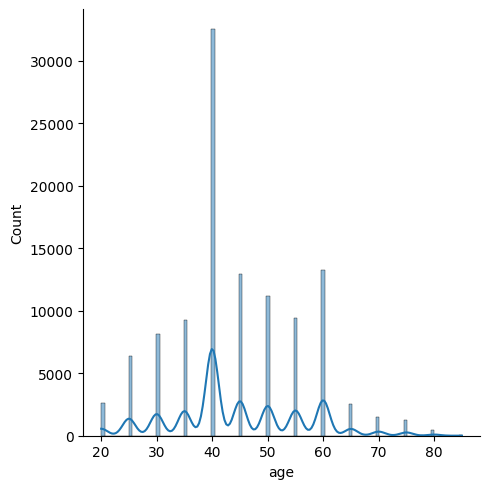

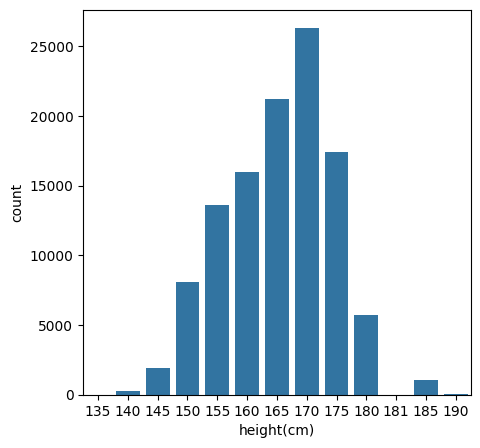

<Figure size 500x500 with 0 Axes>

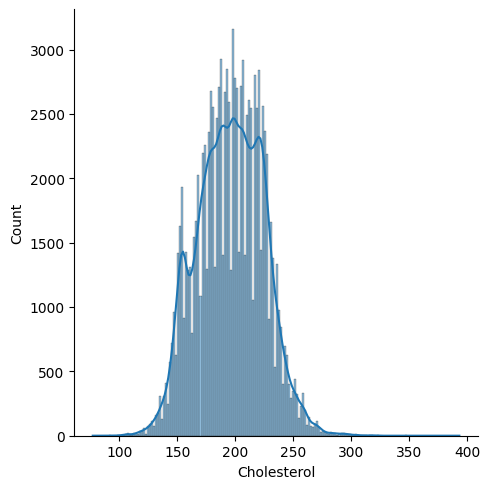

<Figure size 500x500 with 0 Axes>

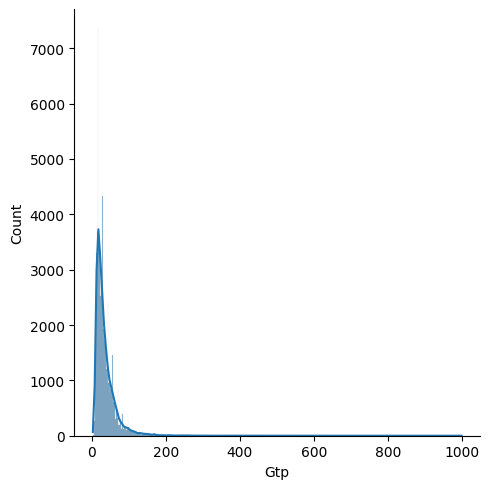

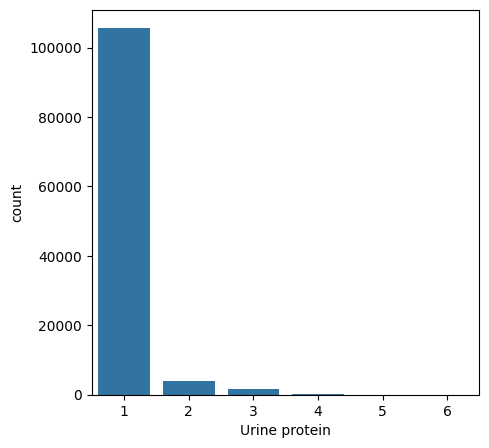

<Figure size 500x500 with 0 Axes>

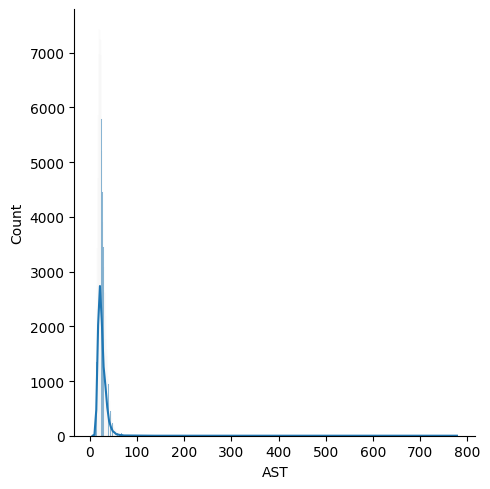

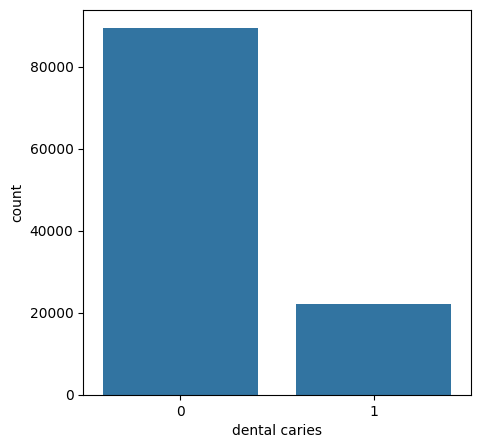

<Figure size 500x500 with 0 Axes>

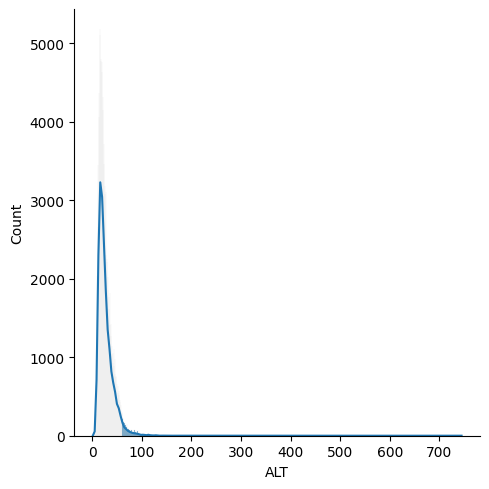

<Figure size 500x500 with 0 Axes>

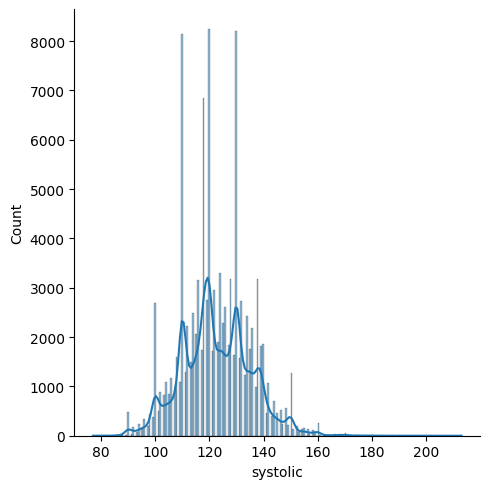

<Figure size 500x500 with 0 Axes>

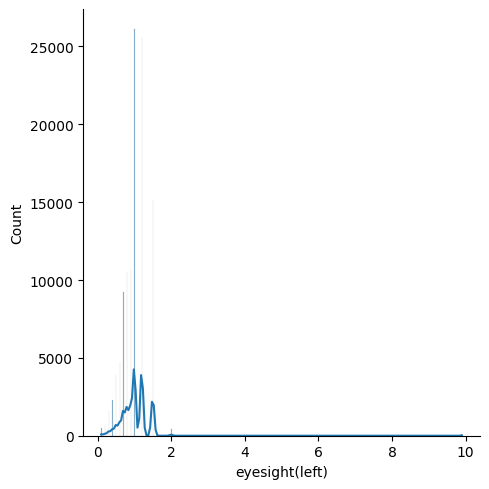

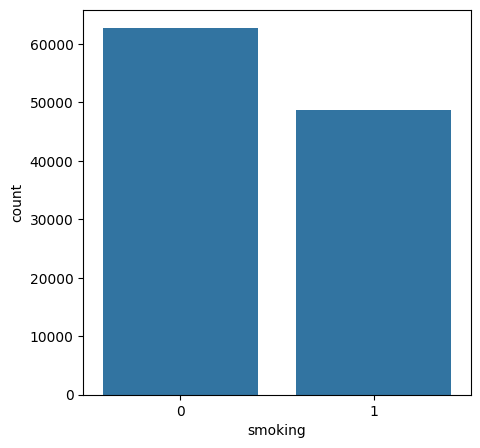

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(0,len(cols)):
    l=train_data[cols[i]].unique()
    plt.figure(figsize=(5,5))
    if len(l)<15:
        sns.countplot(train_data,x=cols[i])
    else:
        sns.displot(train_data, kde=True,x=cols[i])
    plt.show()


# Bivariate analysis for the target with every feature

<Figure size 600x600 with 0 Axes>

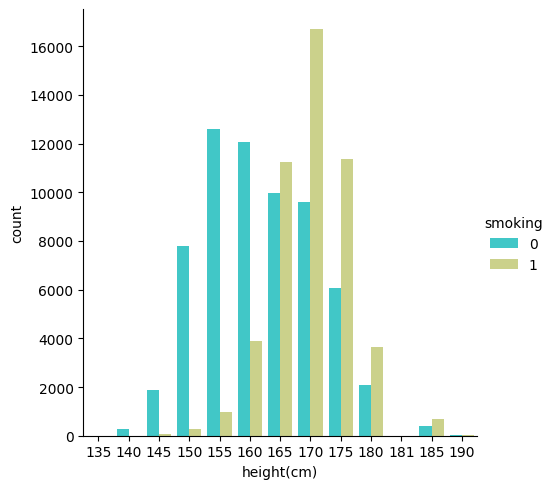

<Figure size 600x600 with 0 Axes>

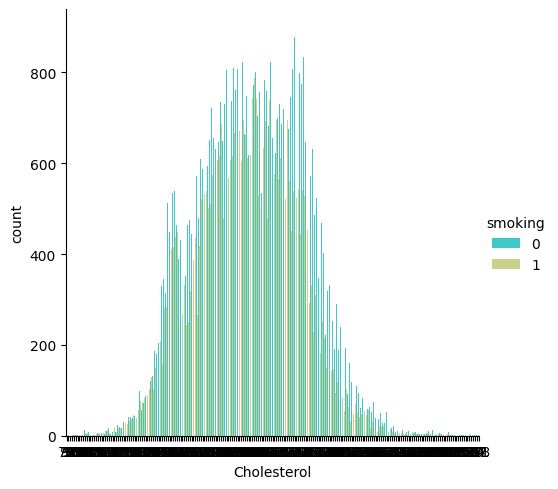

<Figure size 600x600 with 0 Axes>

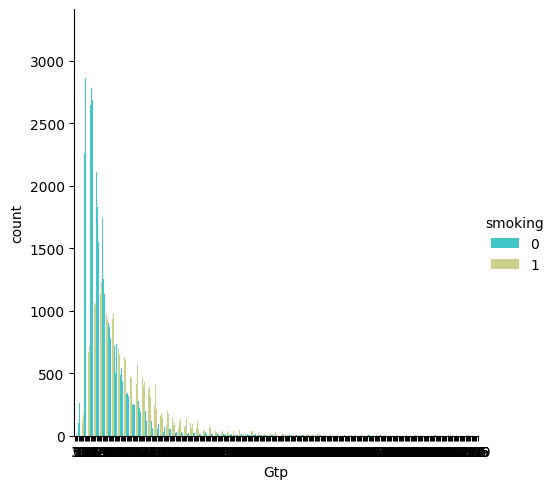

<Figure size 600x600 with 0 Axes>

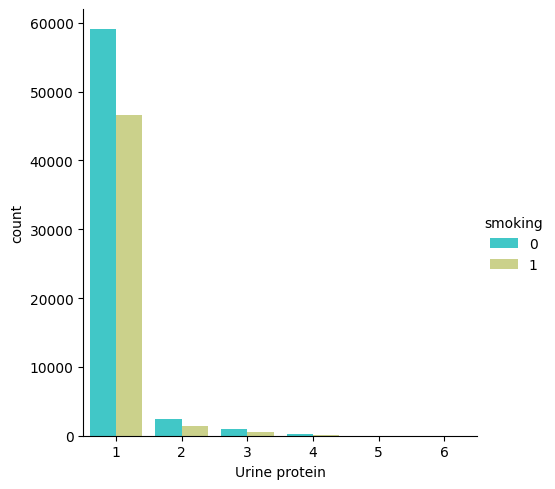

<Figure size 600x600 with 0 Axes>

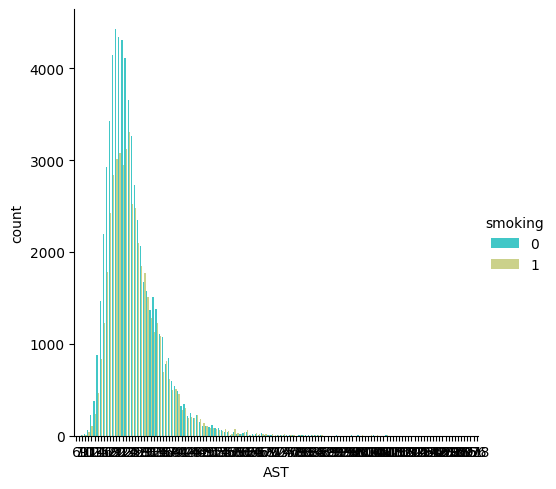

<Figure size 600x600 with 0 Axes>

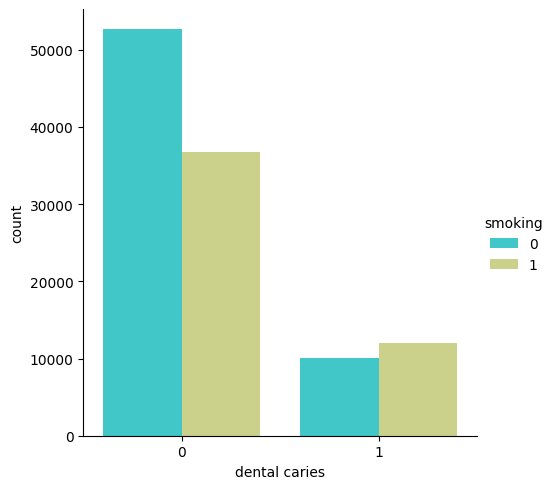

<Figure size 600x600 with 0 Axes>

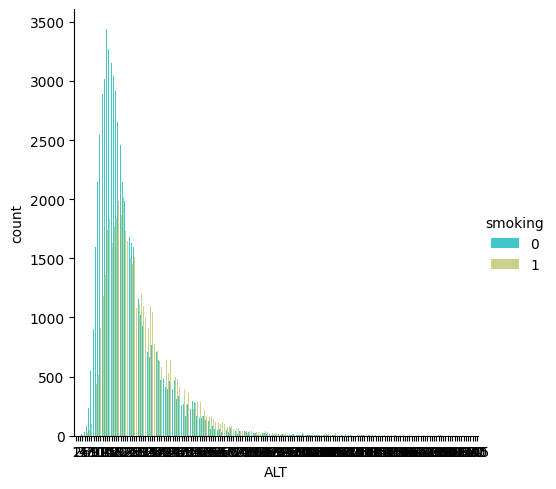

<Figure size 600x600 with 0 Axes>

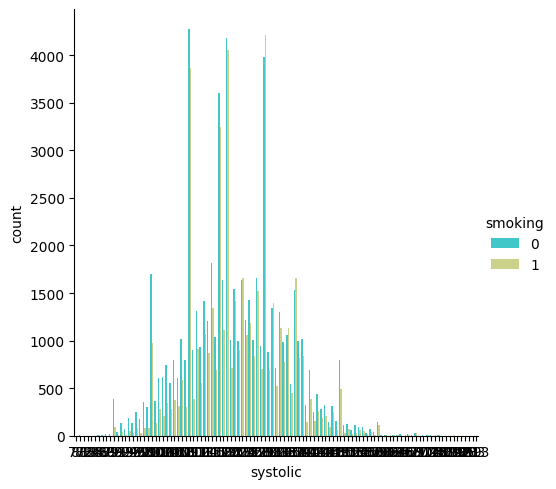

<Figure size 600x600 with 0 Axes>

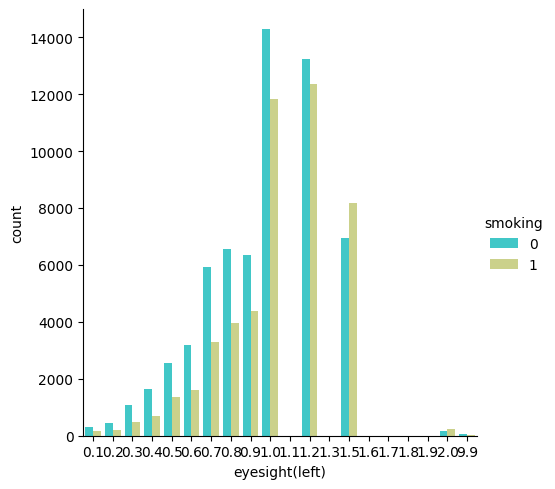

In [11]:
for i in range (1,len(cols)-1):
    plt.figure(figsize=(6,6))
    sns.catplot(x=cols[i],data=train_data,kind="count",hue="smoking",palette="rainbow")
    plt.show()

<Figure size 400x400 with 0 Axes>

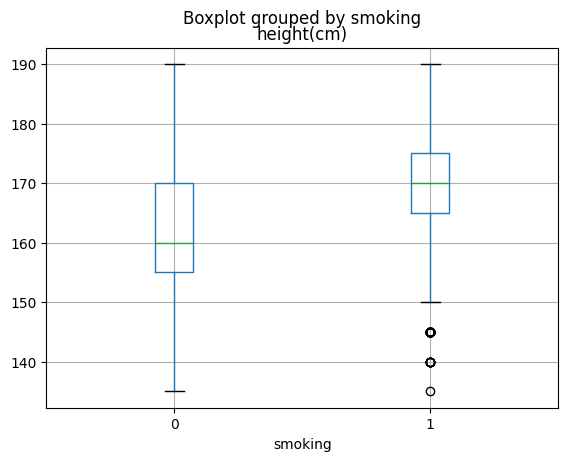

<Figure size 400x400 with 0 Axes>

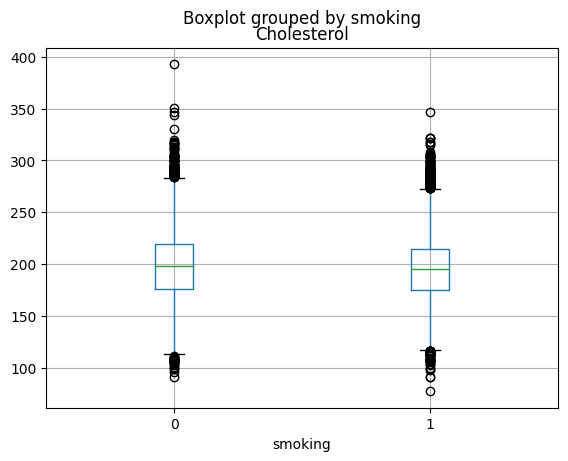

<Figure size 400x400 with 0 Axes>

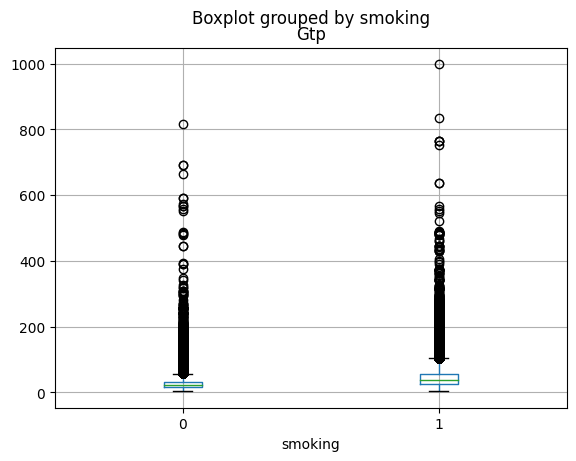

<Figure size 400x400 with 0 Axes>

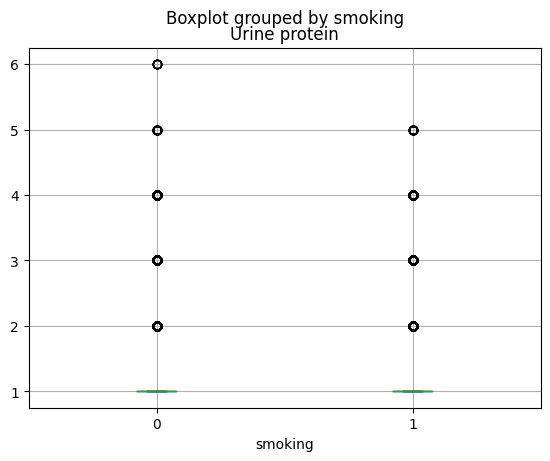

<Figure size 400x400 with 0 Axes>

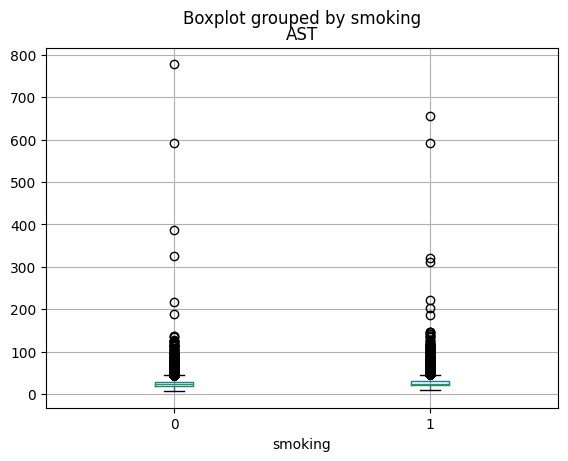

<Figure size 400x400 with 0 Axes>

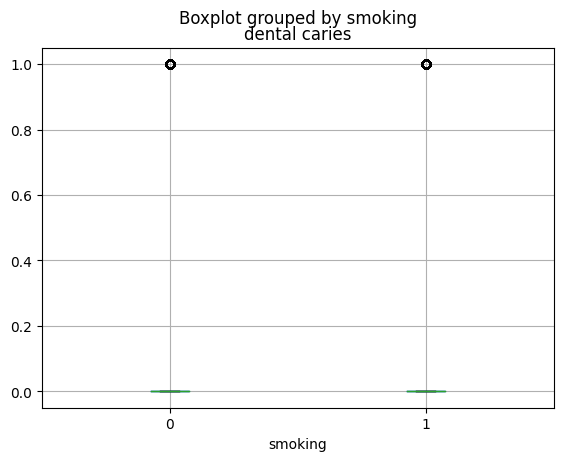

<Figure size 400x400 with 0 Axes>

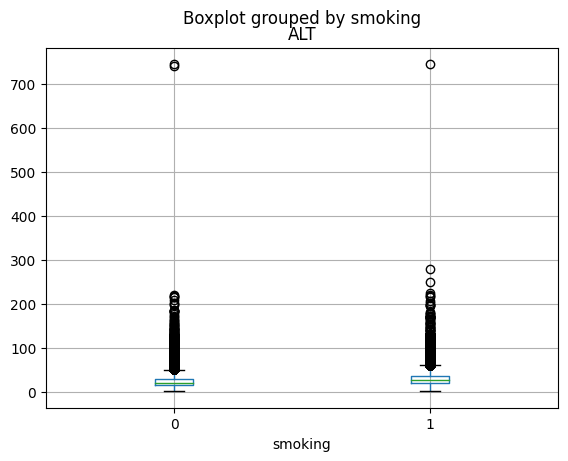

<Figure size 400x400 with 0 Axes>

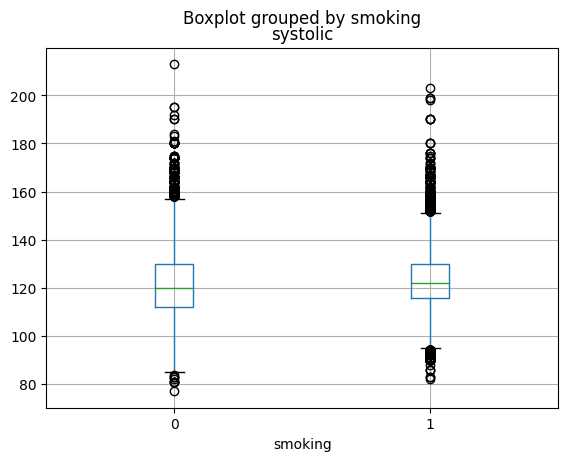

<Figure size 400x400 with 0 Axes>

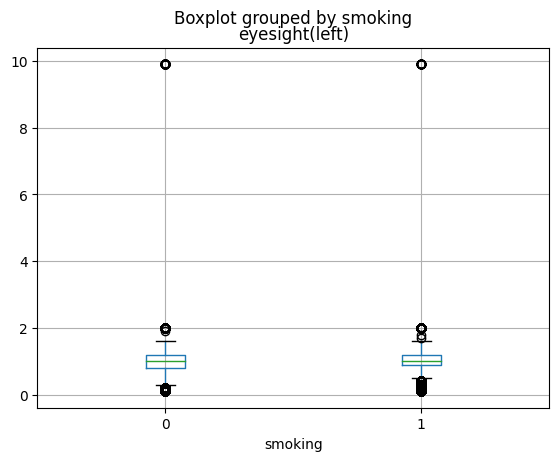

<Figure size 400x400 with 0 Axes>

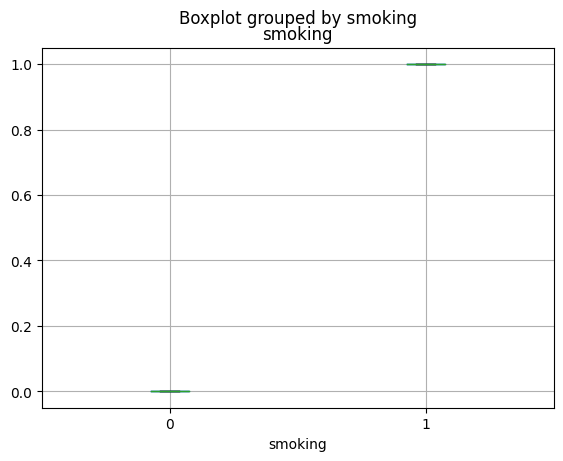

In [12]:
import matplotlib.patheffects
for i in range(1,len(cols)):
    plt.figure(figsize=(4,4))
    train_data.boxplot(column=cols[i],by="smoking",showfliers=True)
    
    plt.show()

In [13]:
cat_features=[]
for i in range(1,len(cols)-1):
    l=train_data[cols[i]].unique()
    if len(l)<10:
        cat_features.append(cols[i])
print(cat_features)

['Urine protein', 'dental caries']


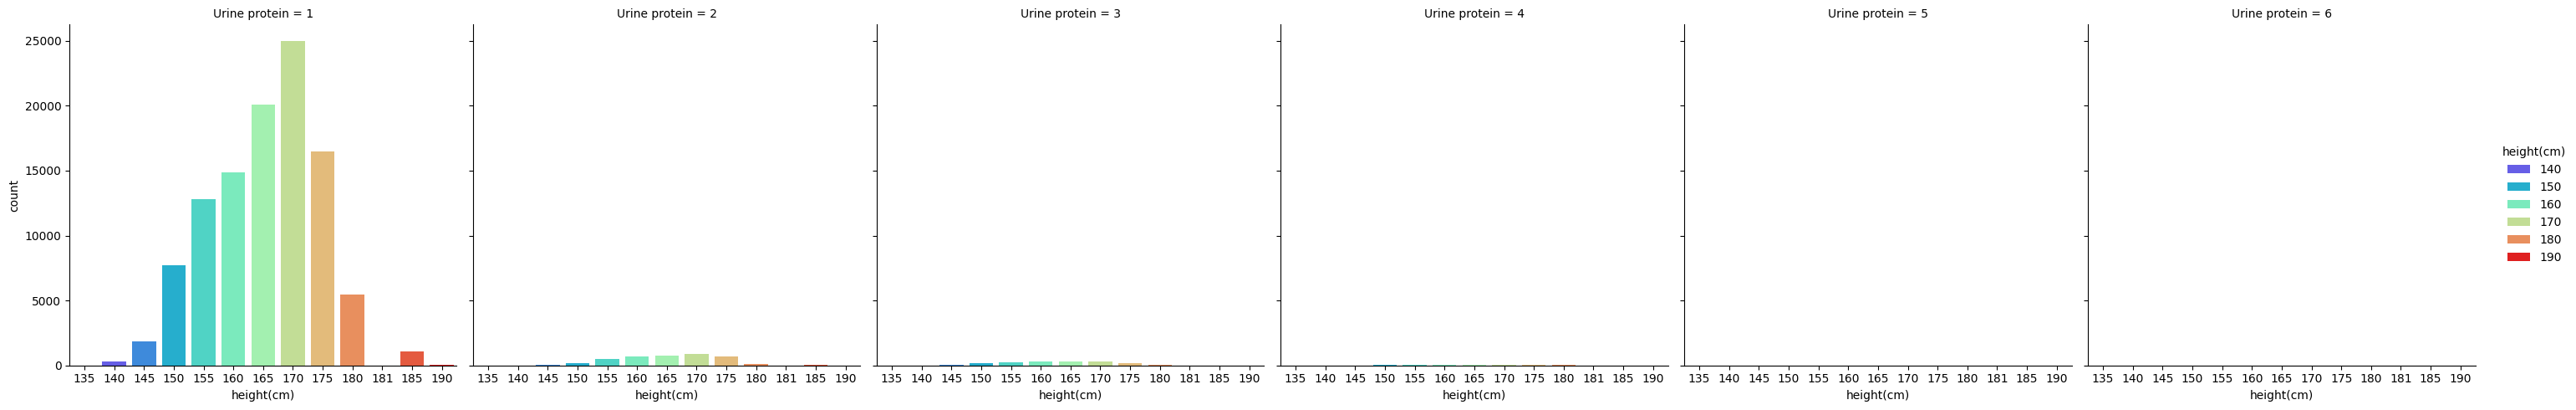

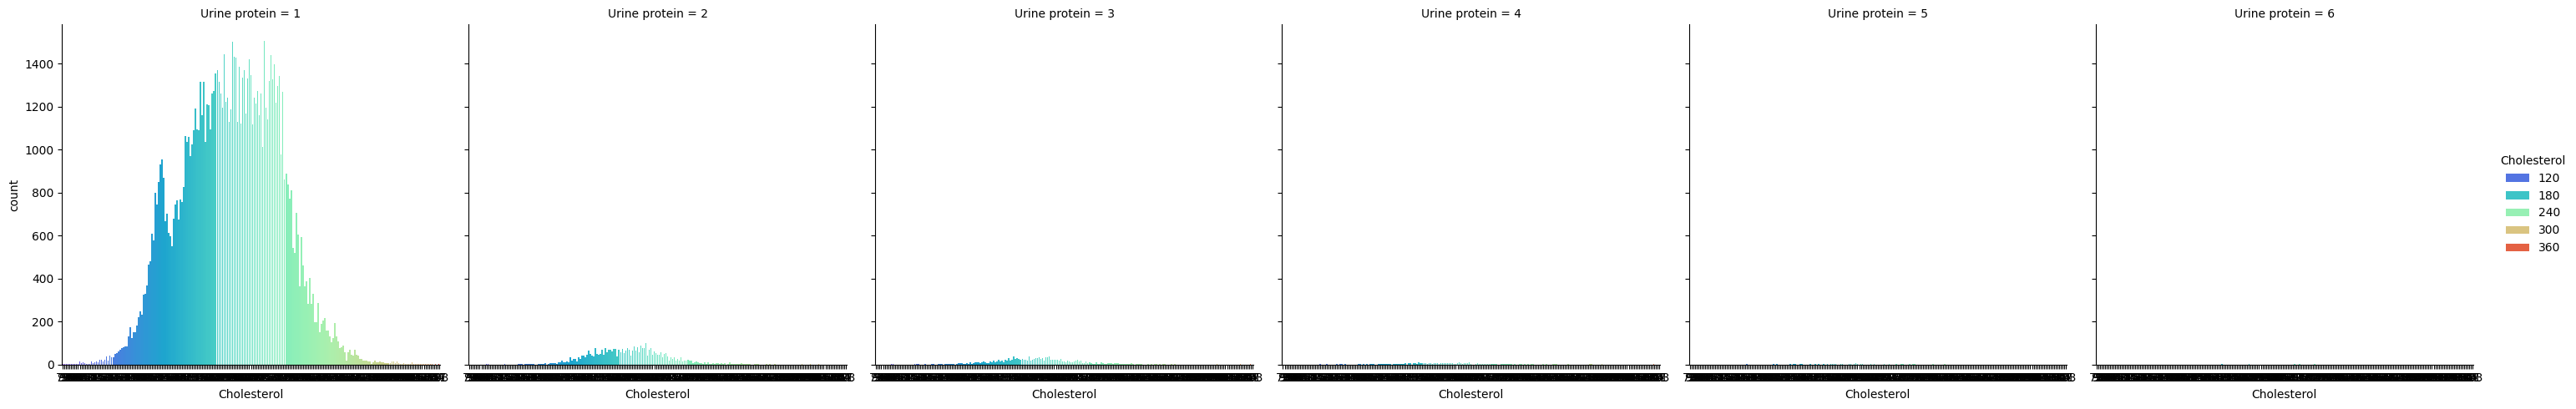

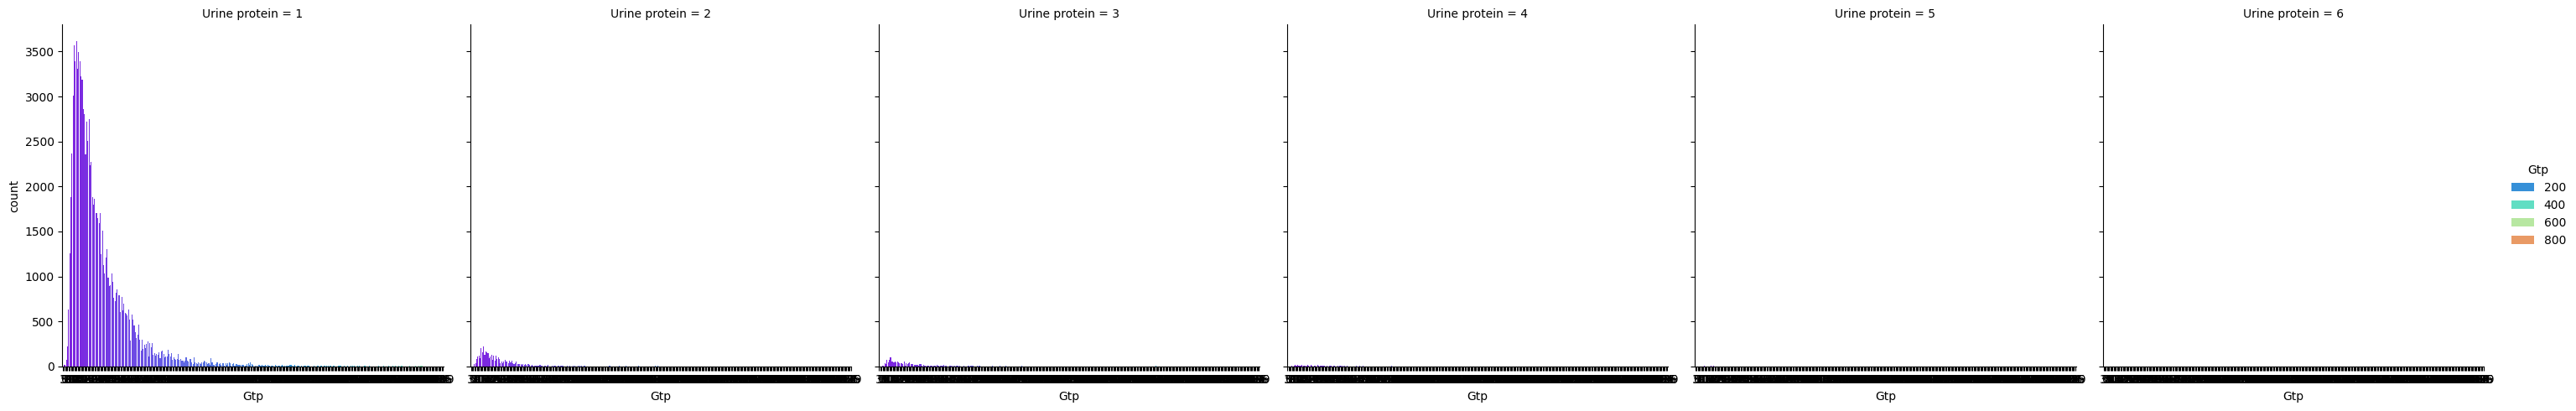

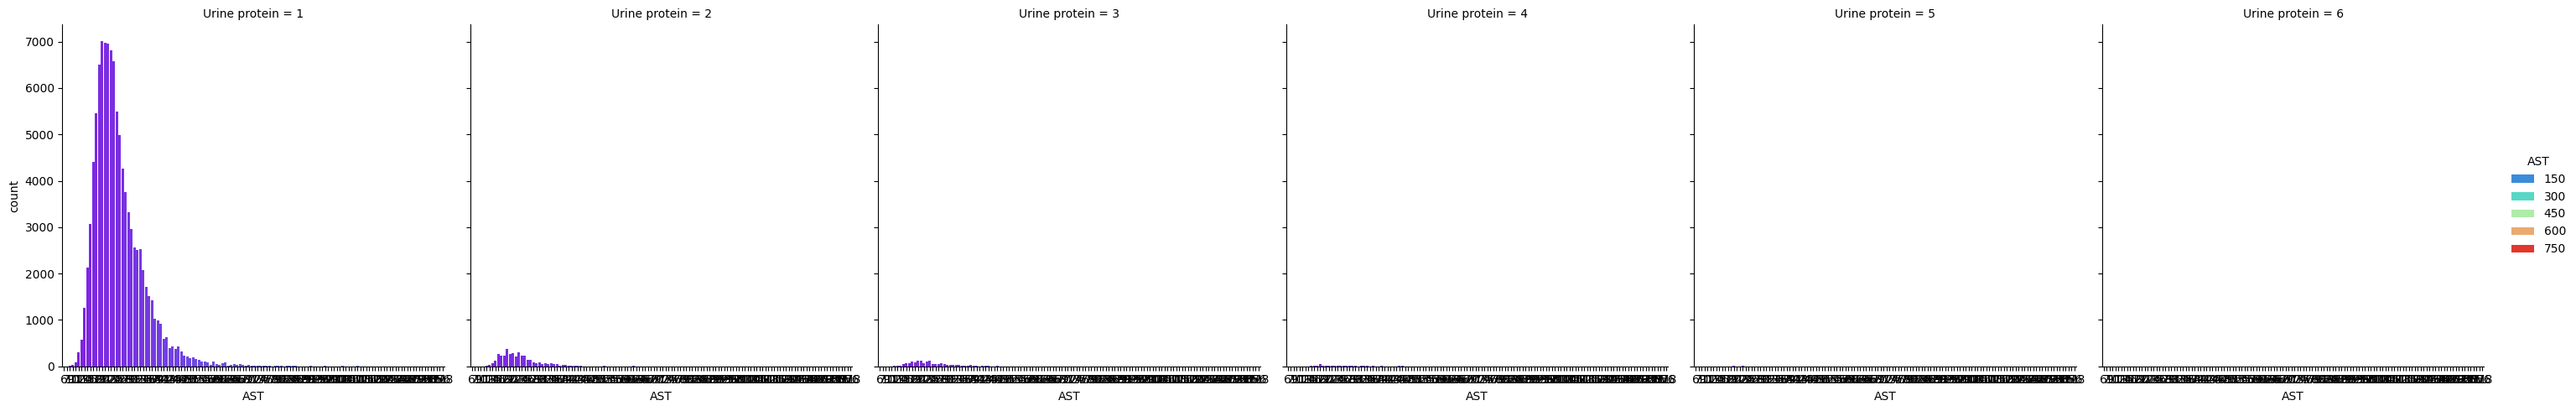

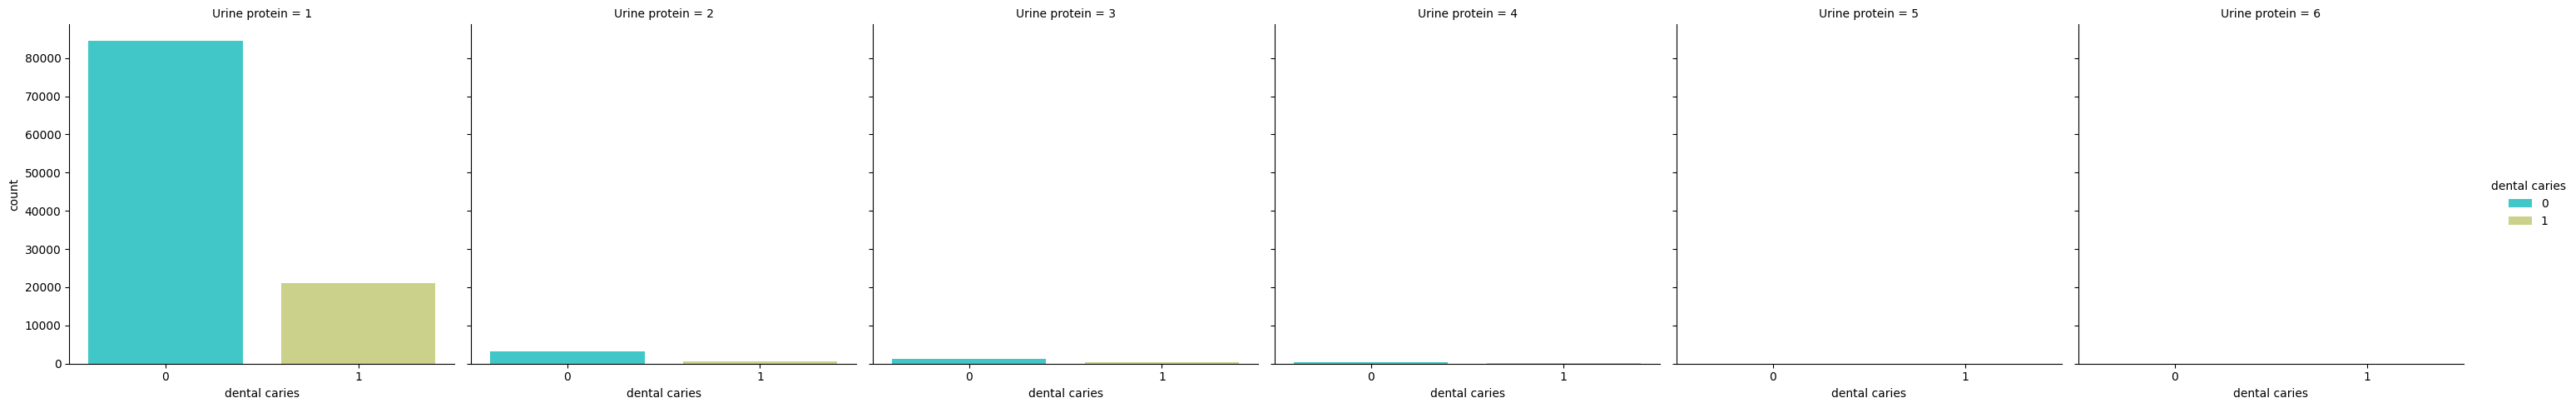

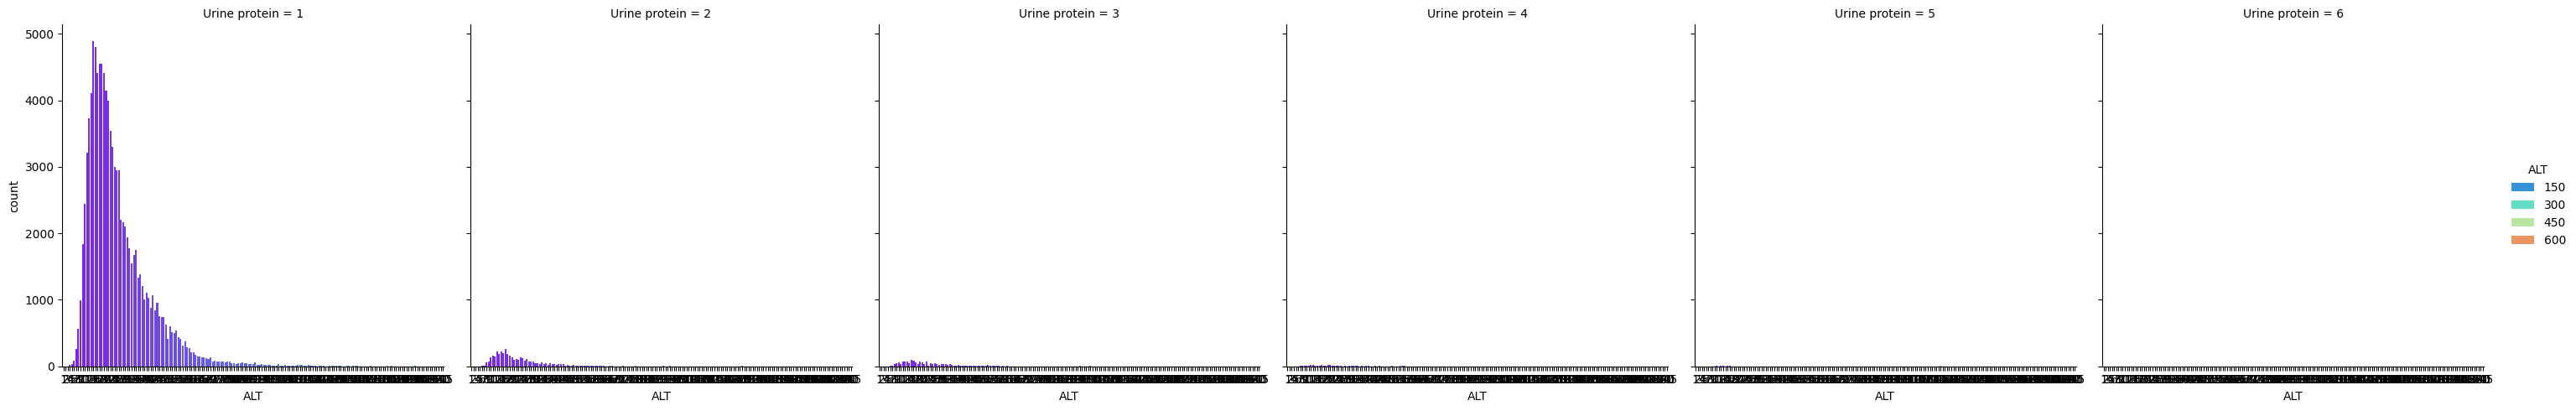

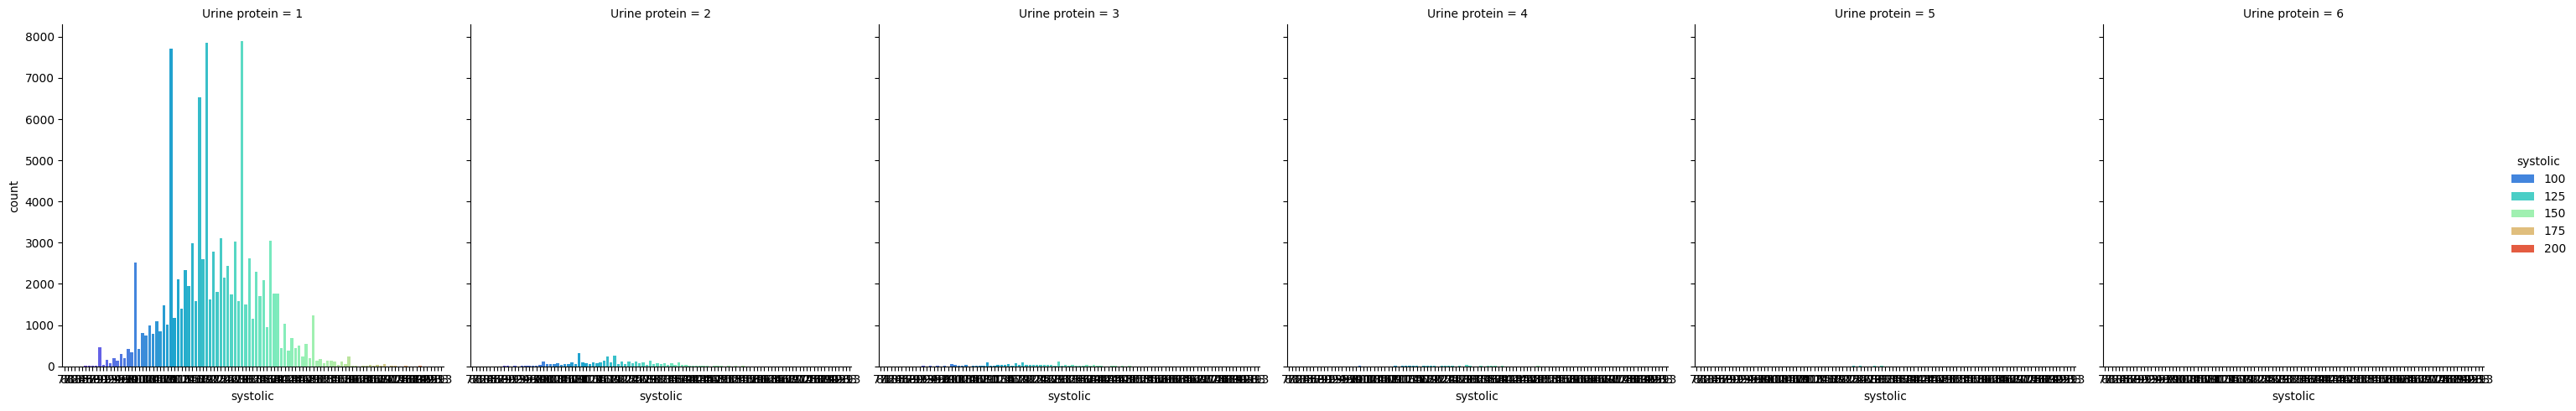

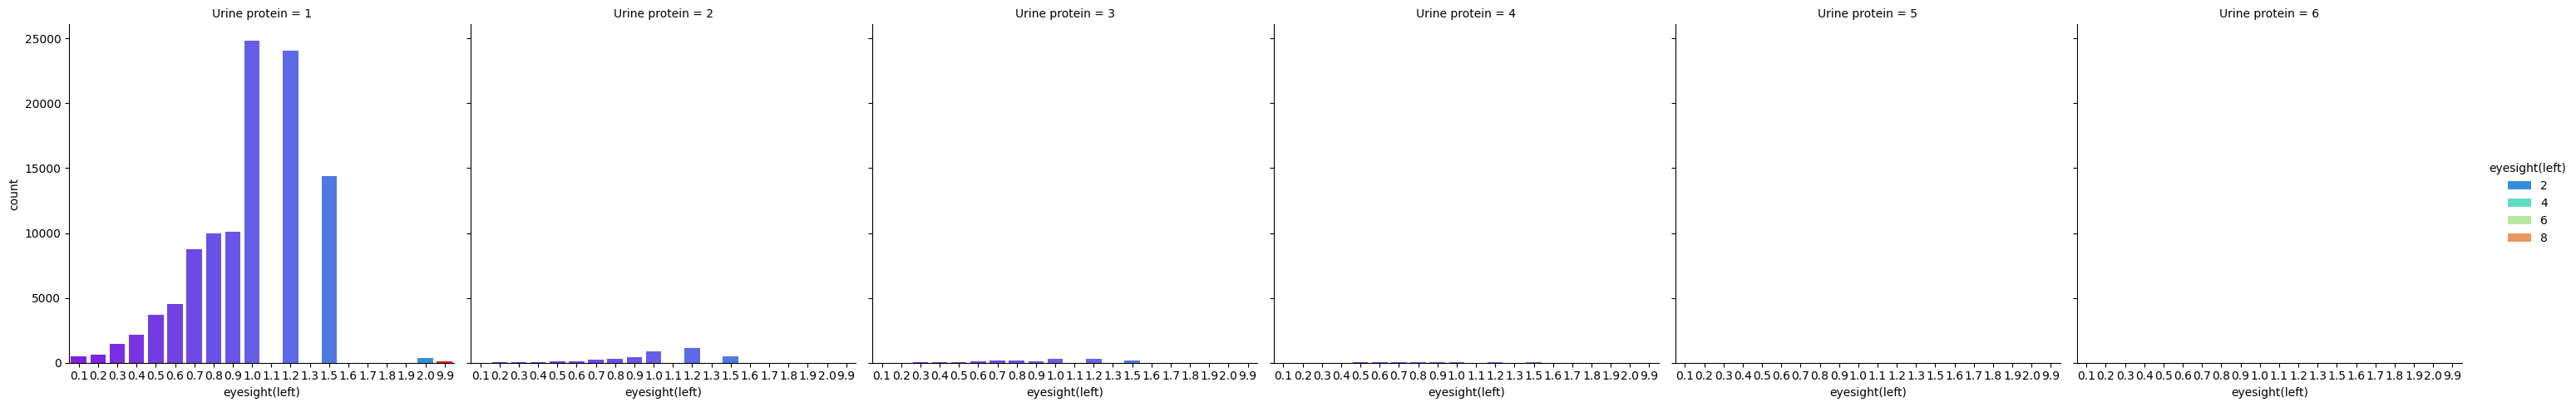

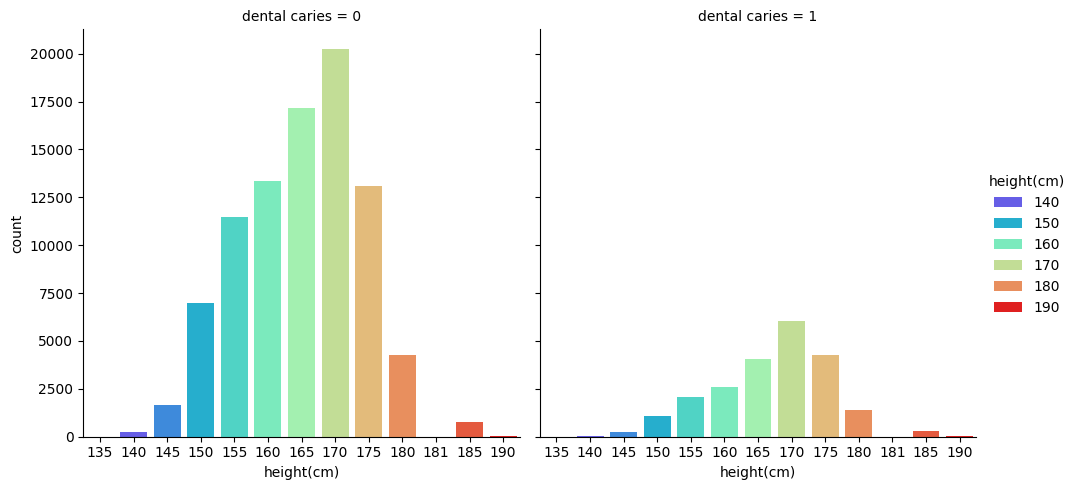

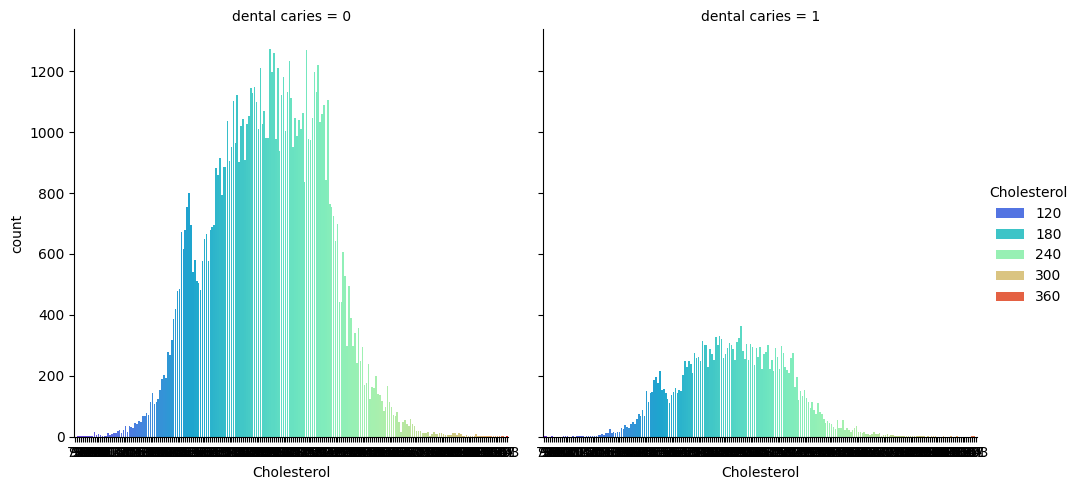

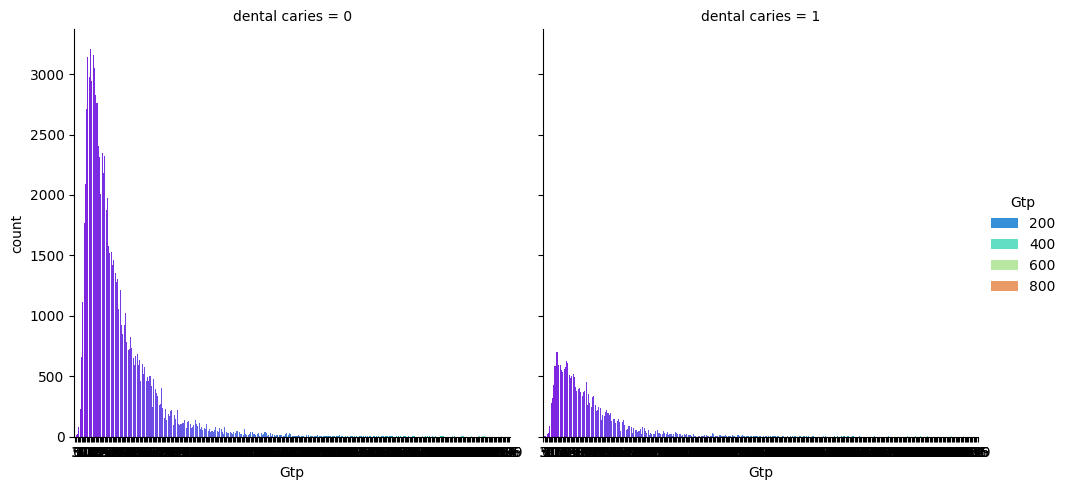

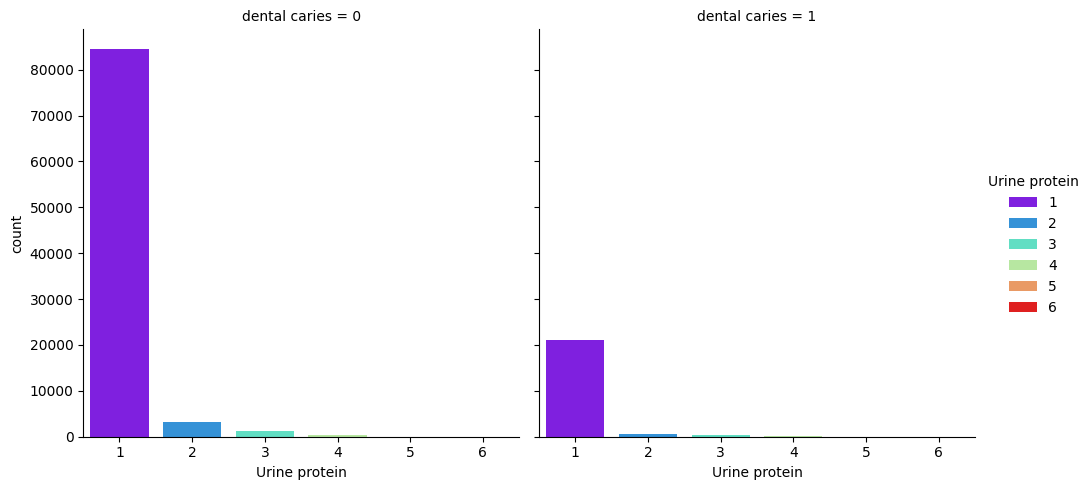

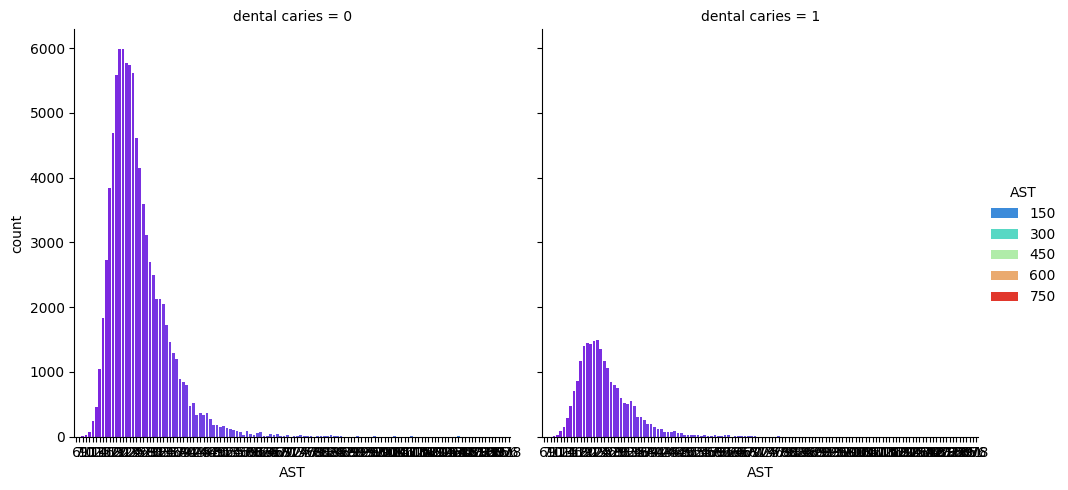

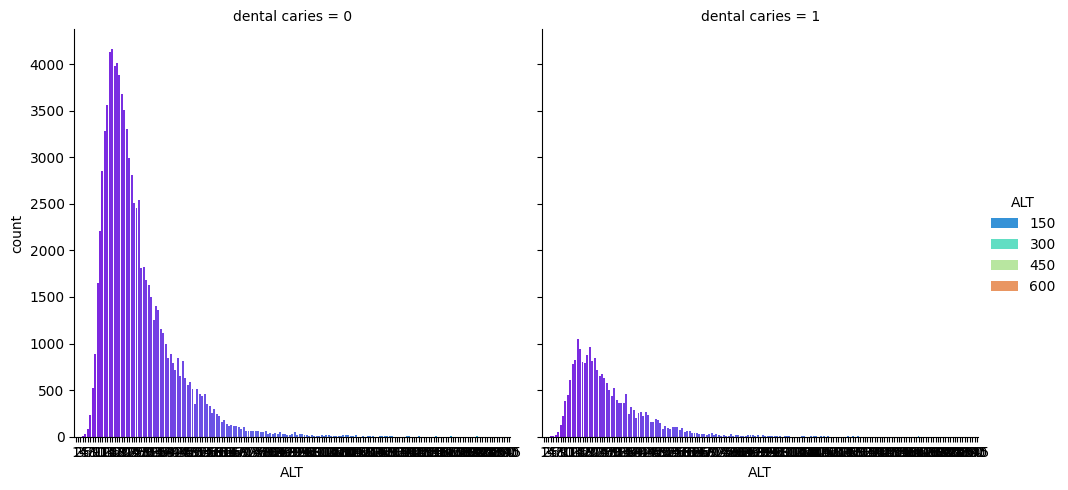

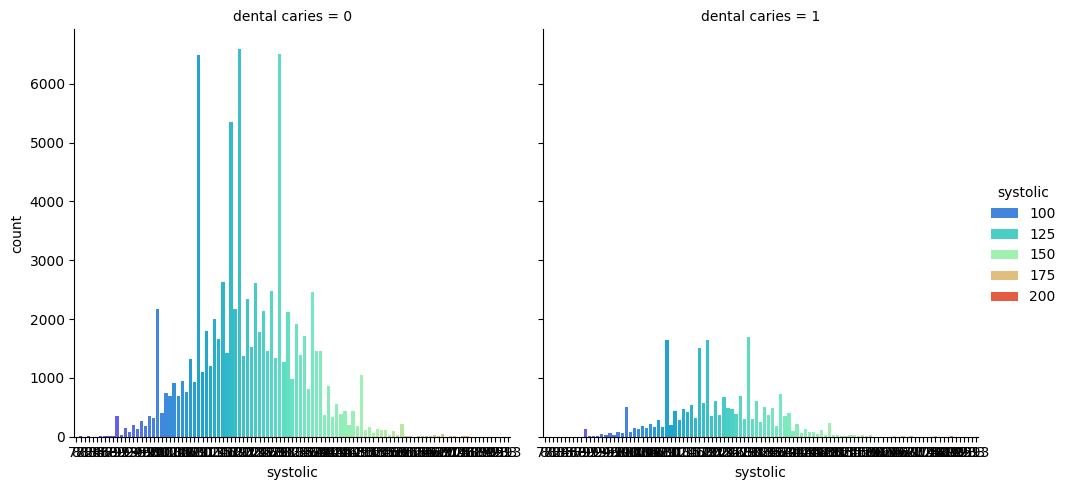

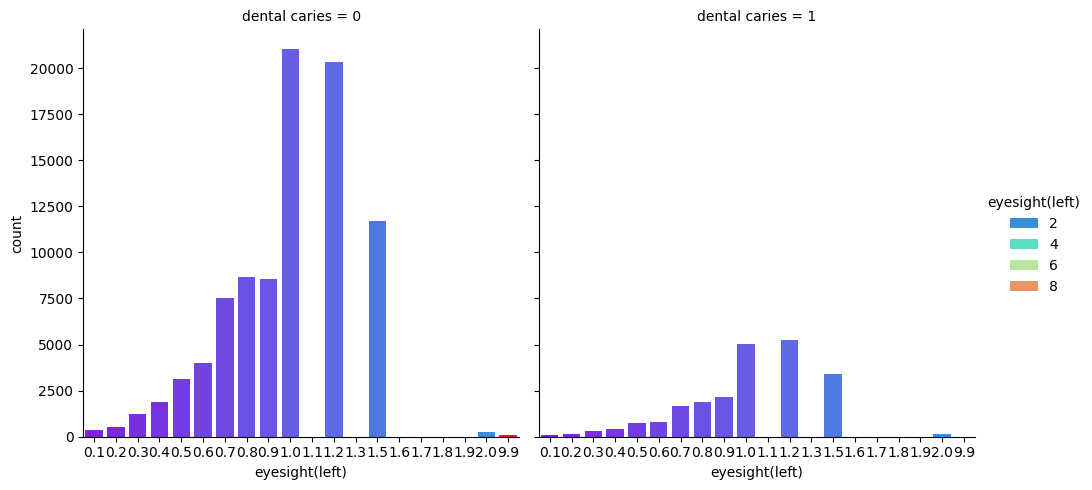

In [14]:
for j in range (0,len(cat_features)):
    for i in range (1,len(cols)-1):
        if cols[i]==cat_features[j]:
            continue
        sns.catplot(x=cols[i],col=cat_features[j],data=train_data,kind="count",hue=cols[i],palette="rainbow")
        plt.show()

In [15]:
cont_features=[]
for i in range(1,len(cols)-1):
    l=train_data[cols[i]].unique()
    if len(l)>10:
        cont_features.append(cols[i])
print(cont_features)

['height(cm)', 'Cholesterol', 'Gtp', 'AST', 'ALT', 'systolic', 'eyesight(left)']


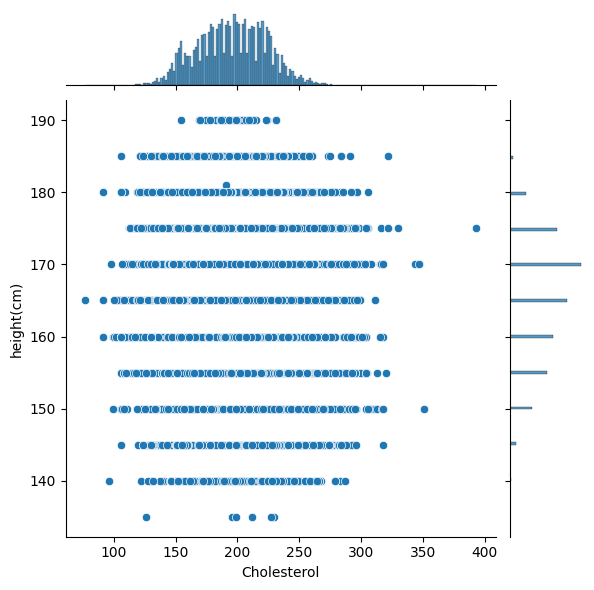

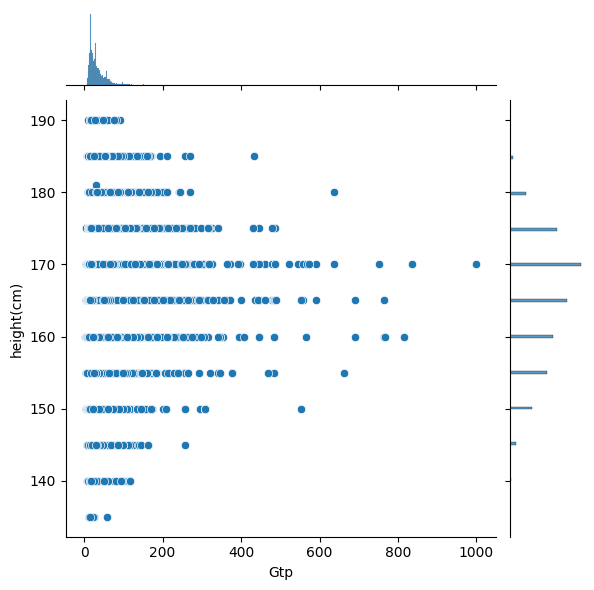

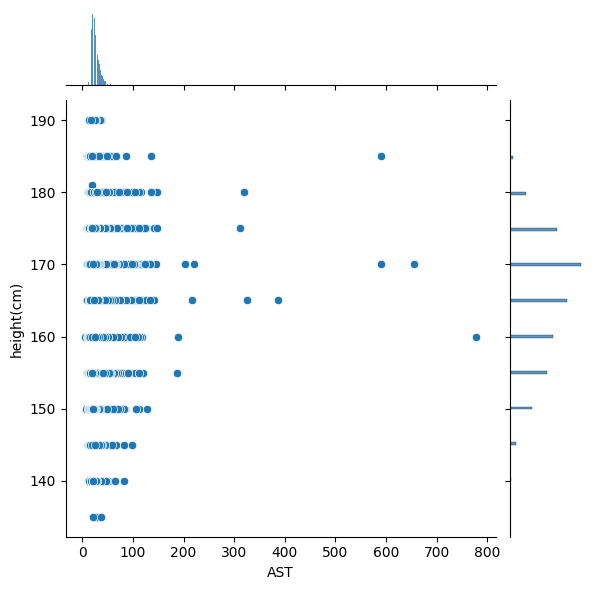

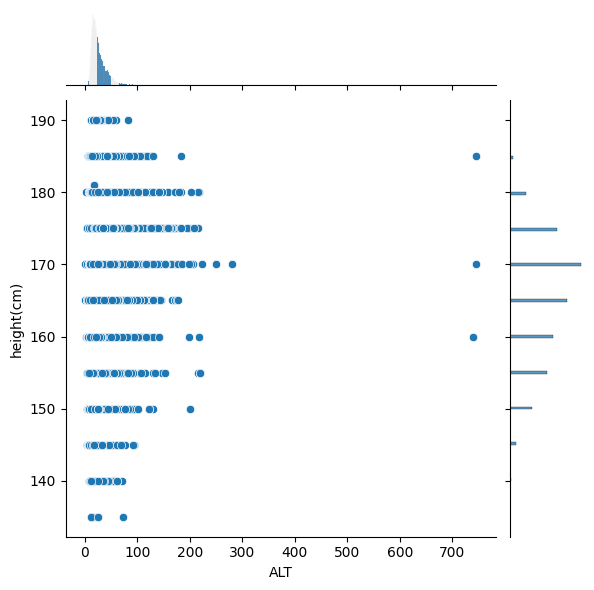

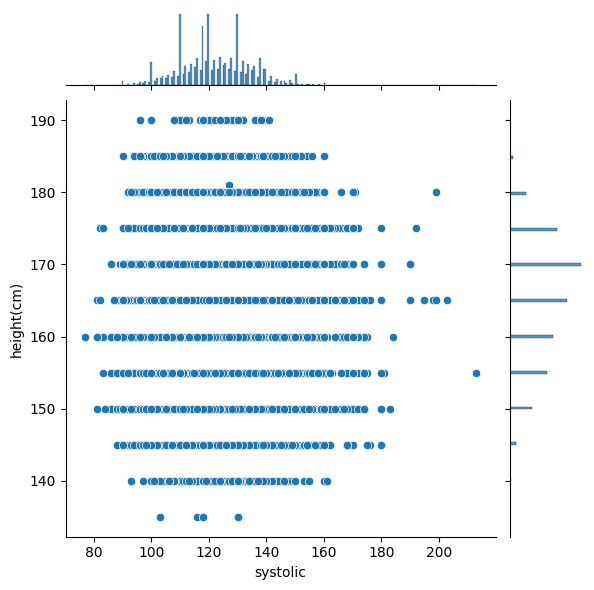

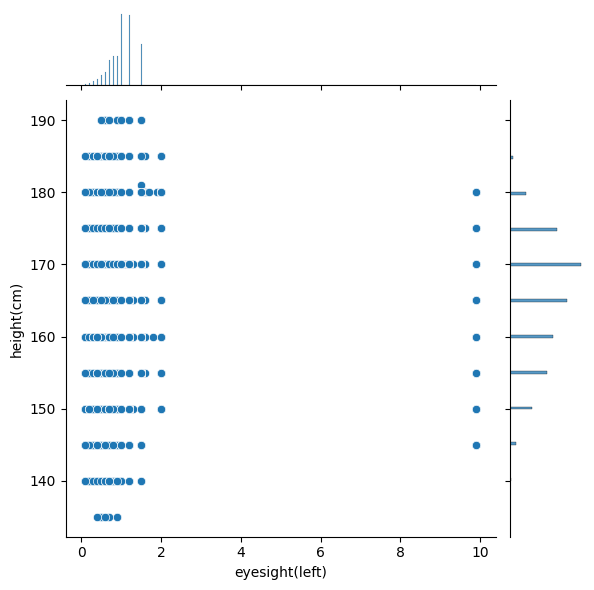

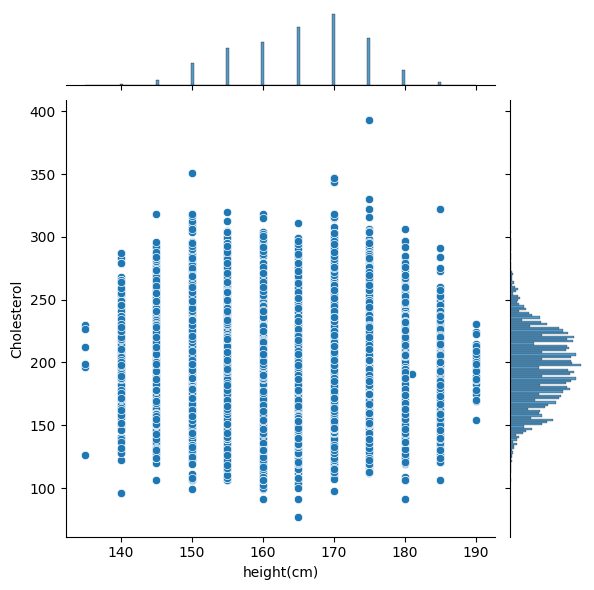

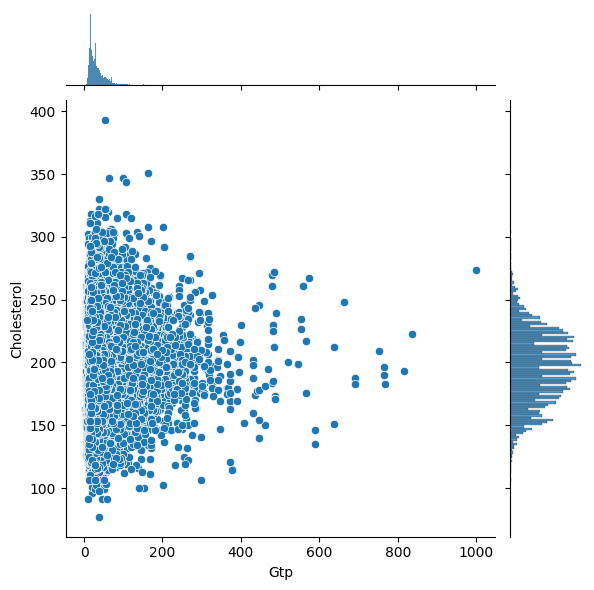

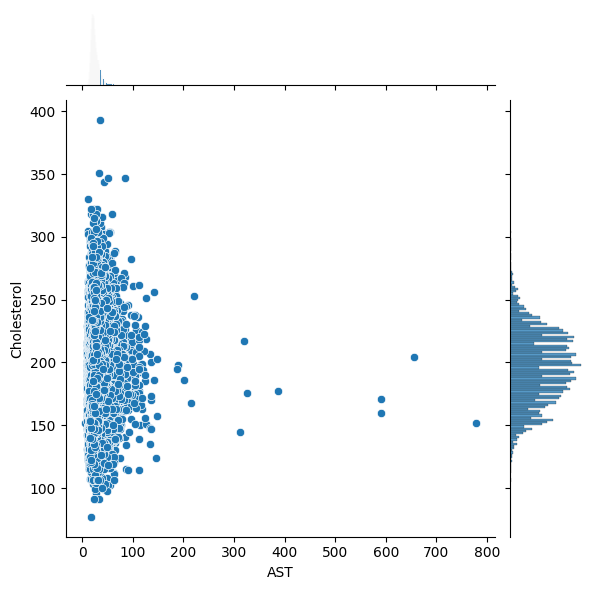

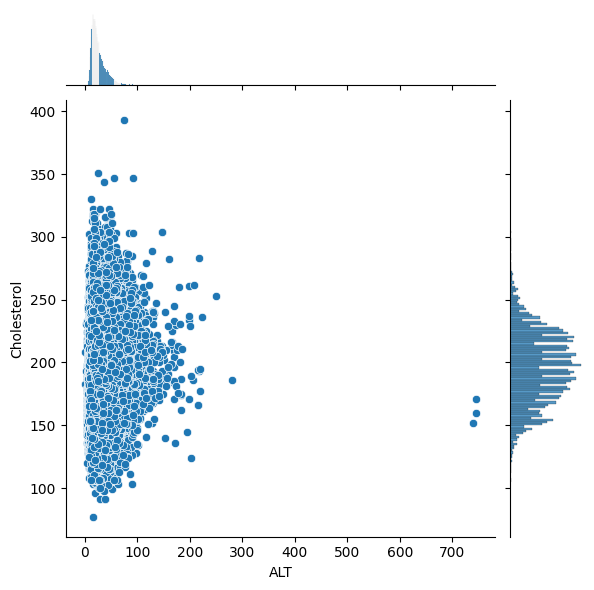

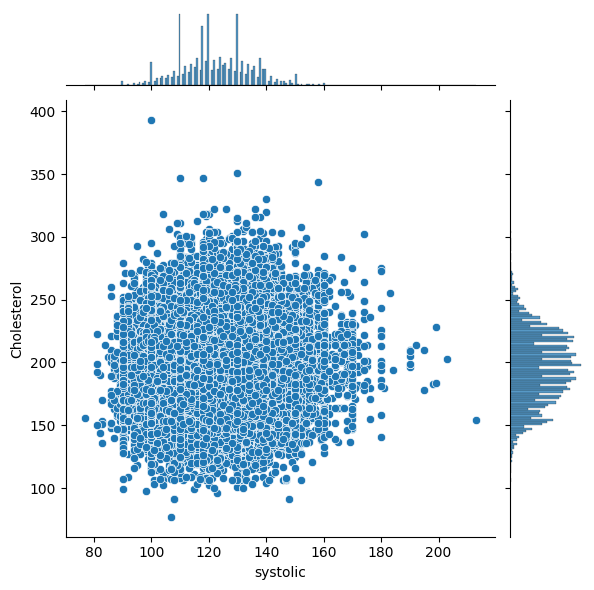

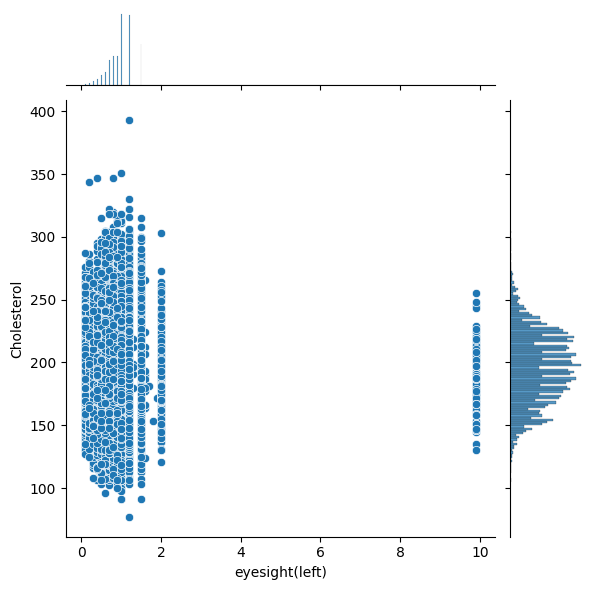

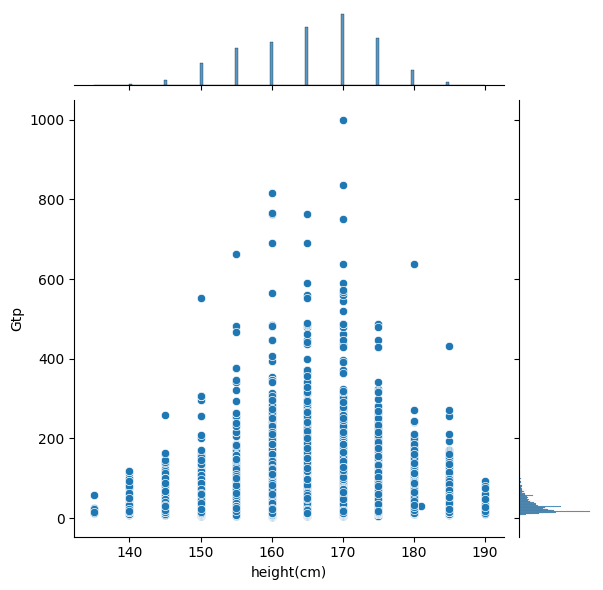

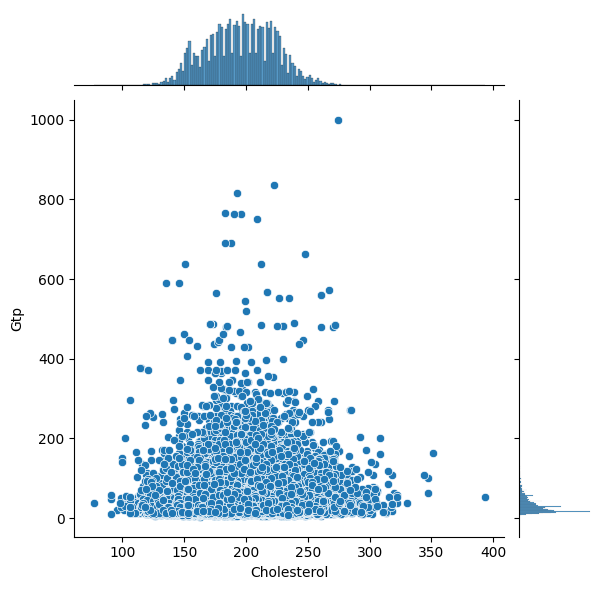

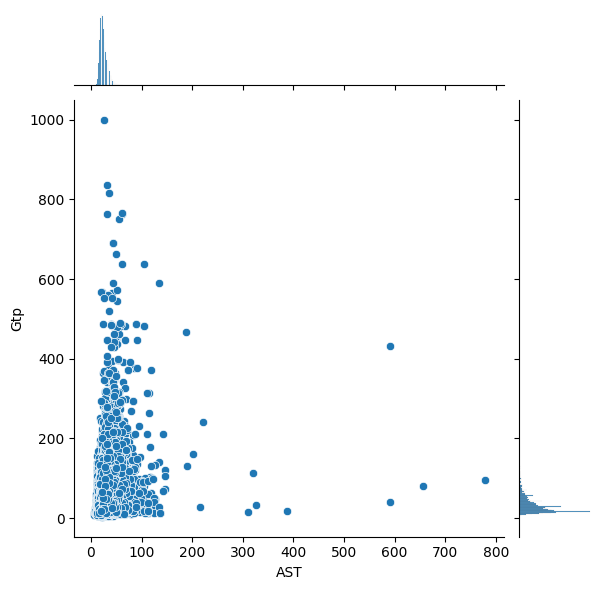

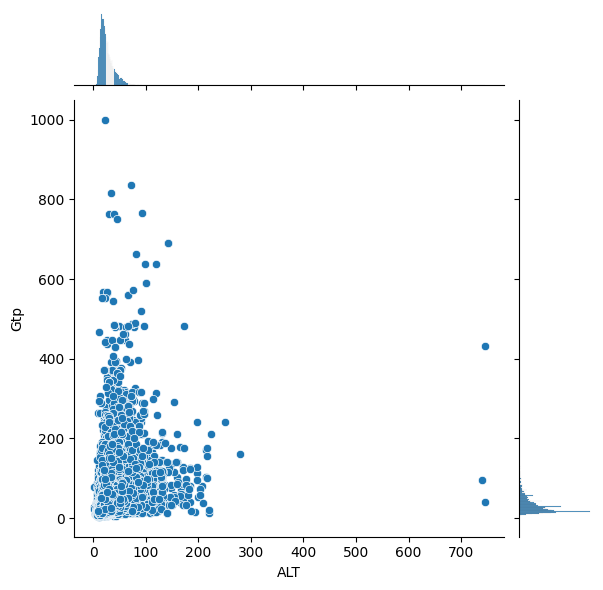

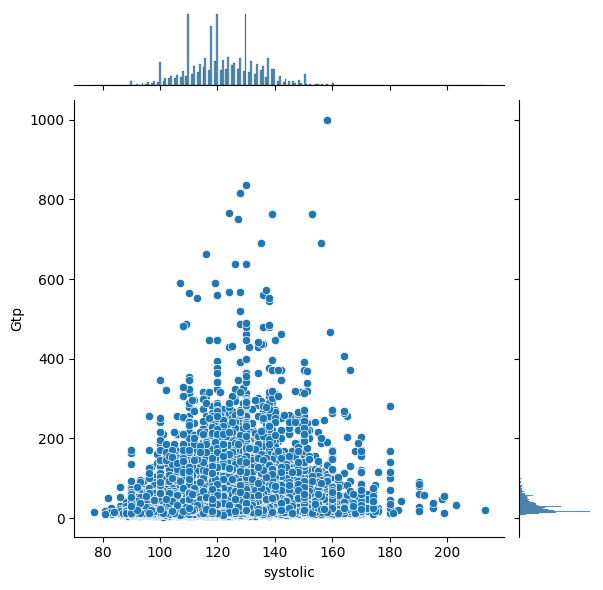

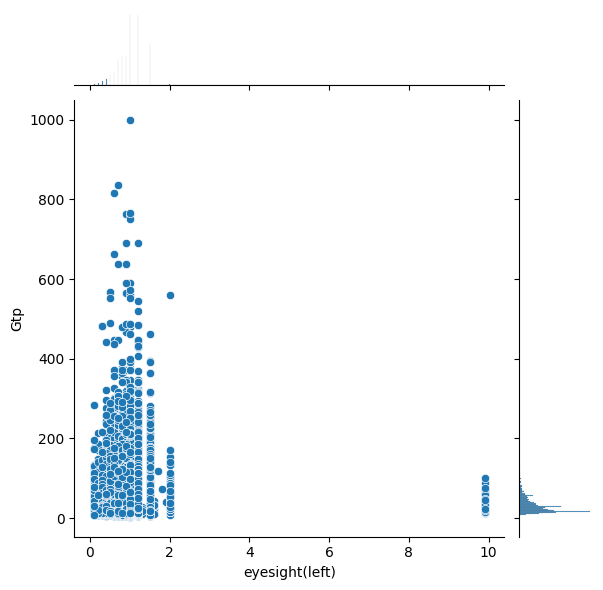

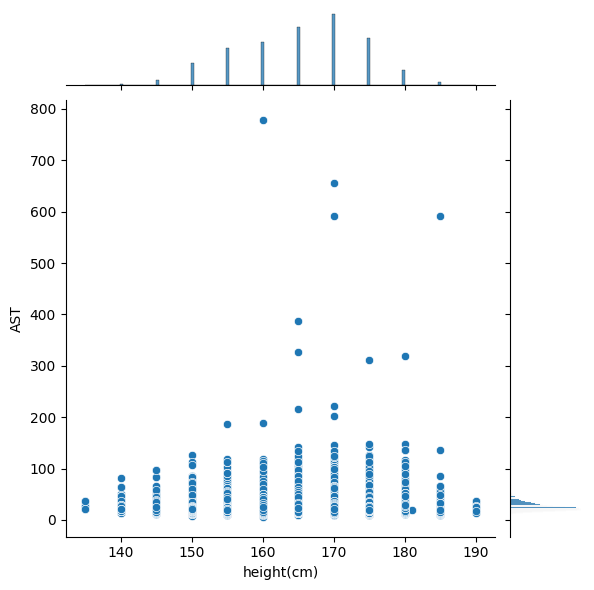

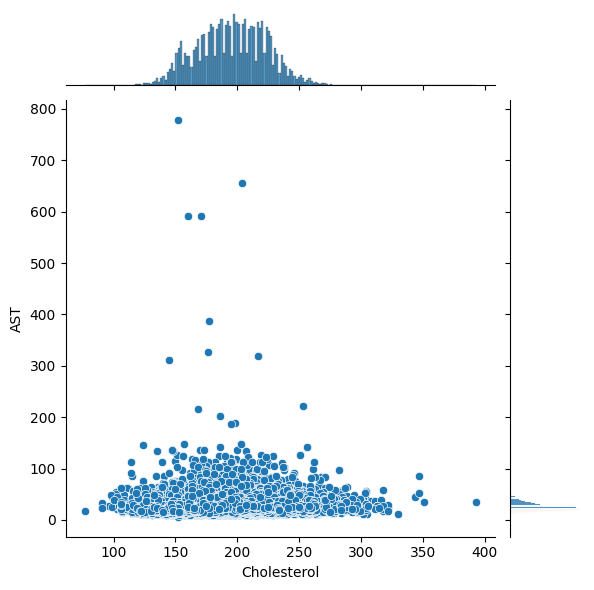

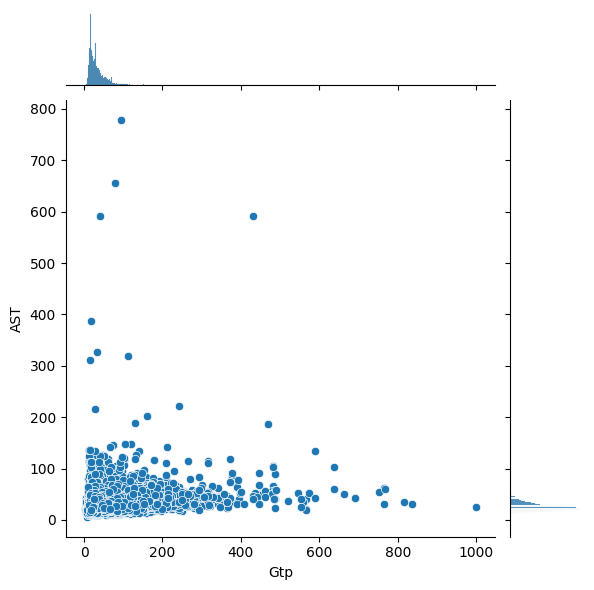

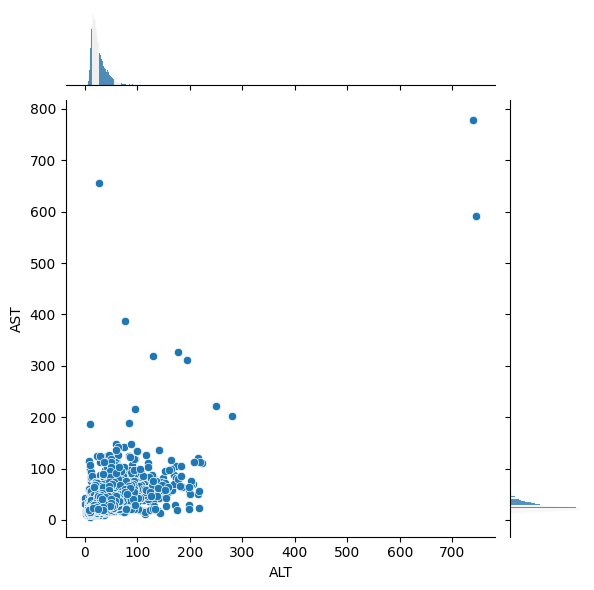

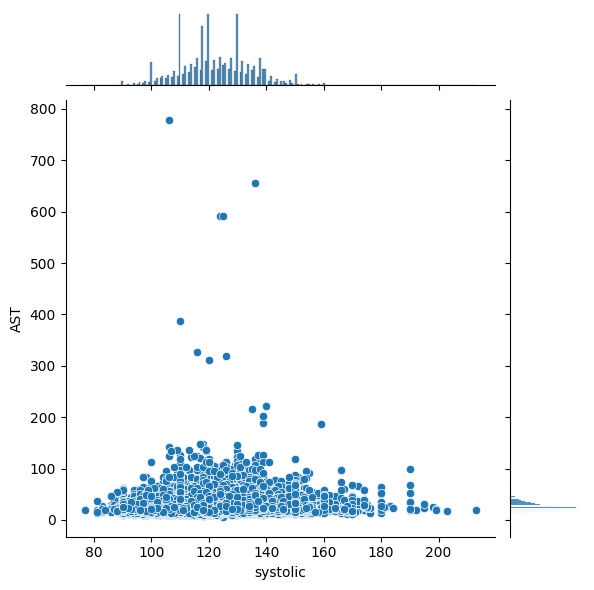

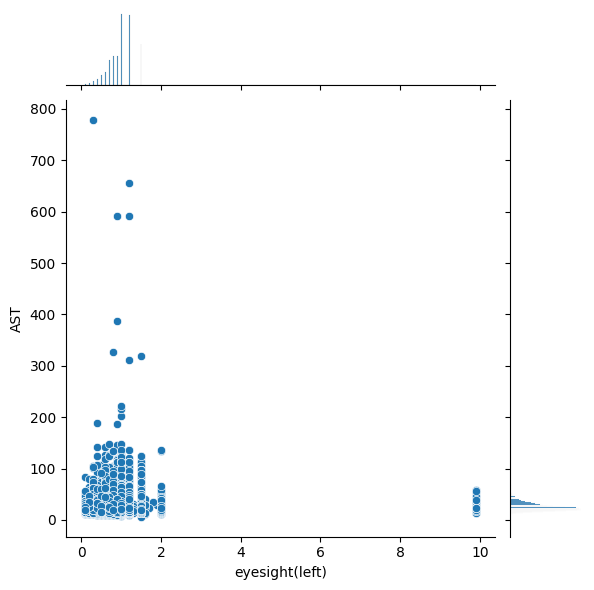

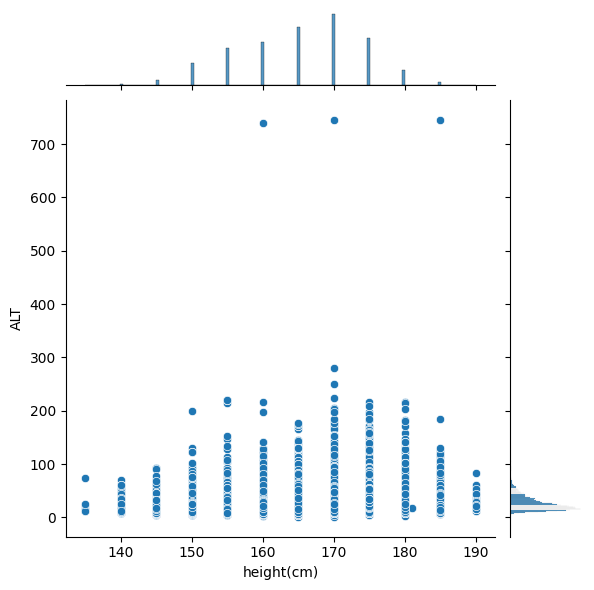

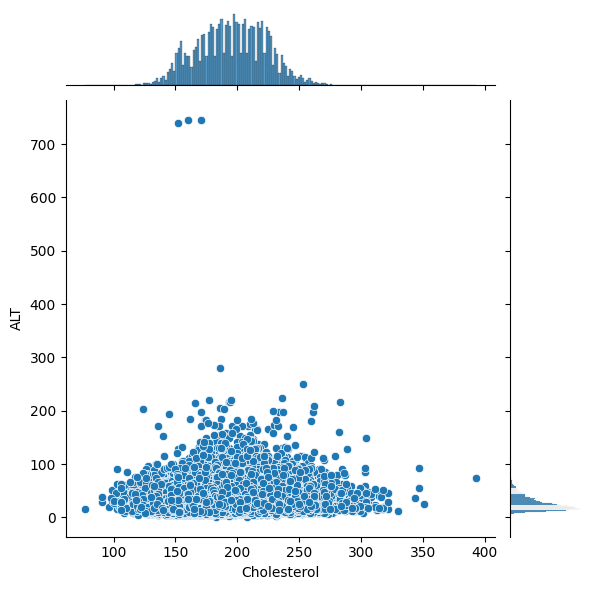

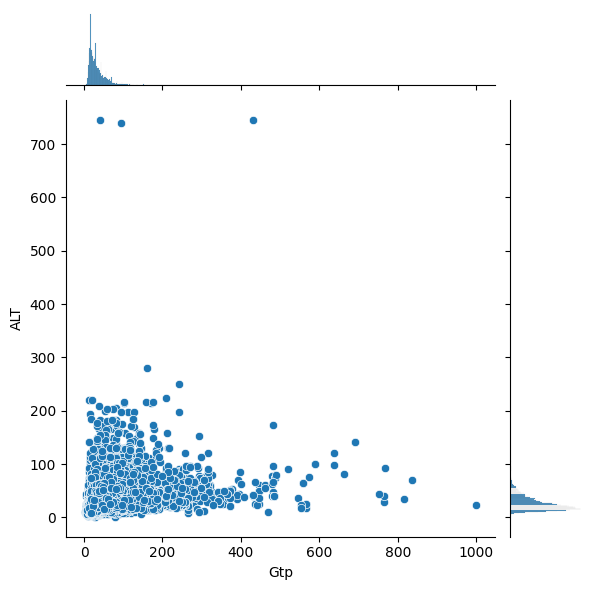

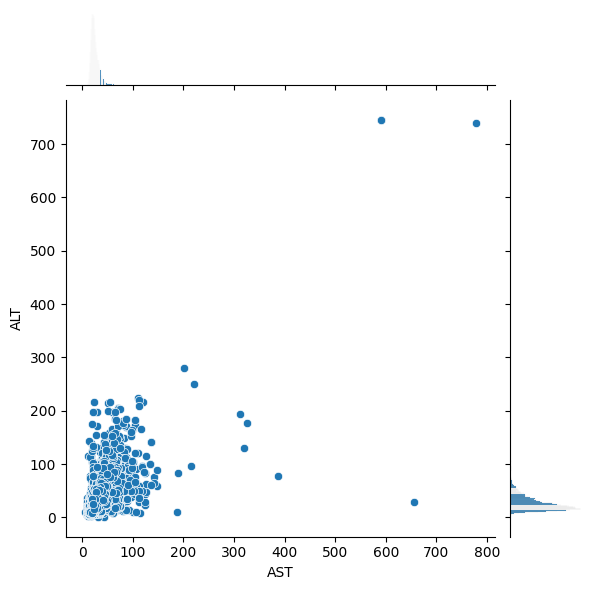

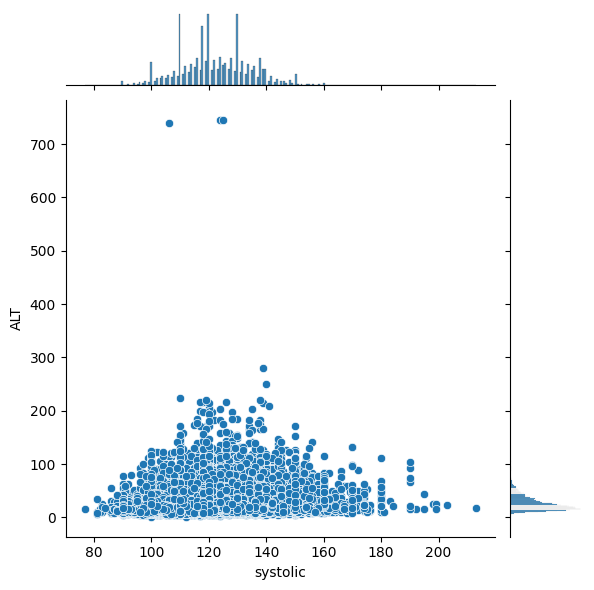

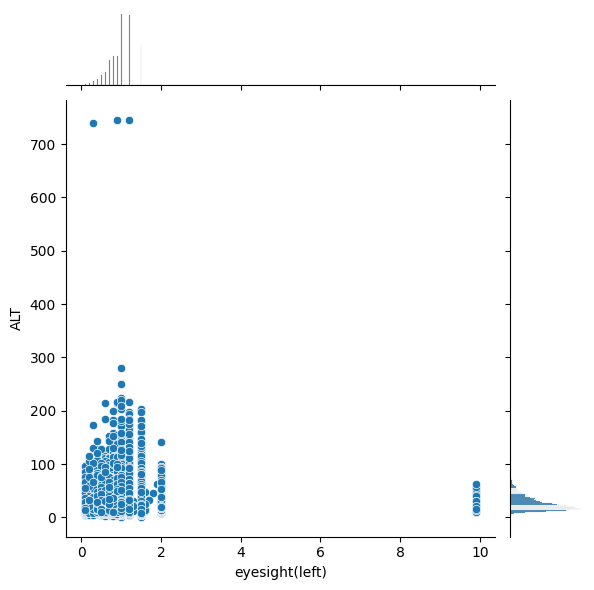

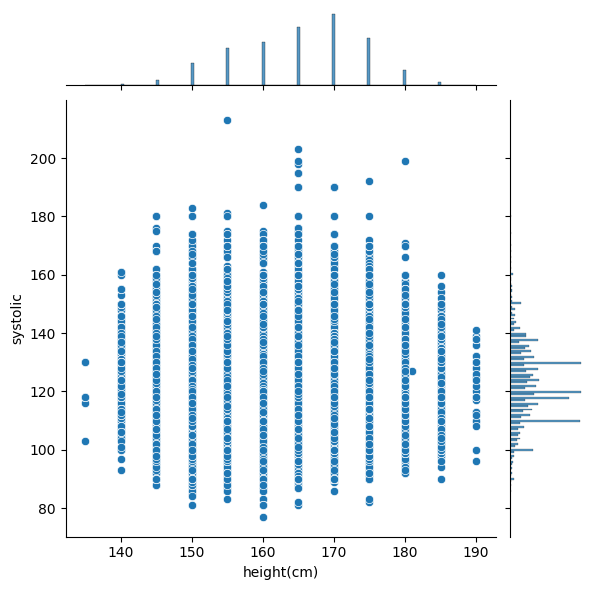

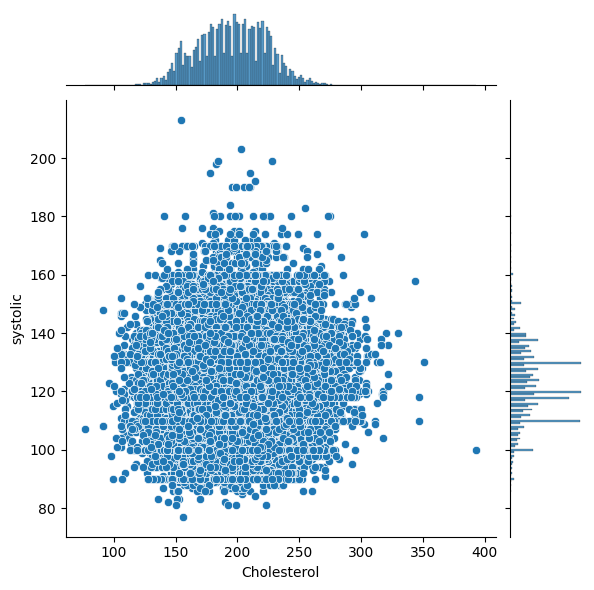

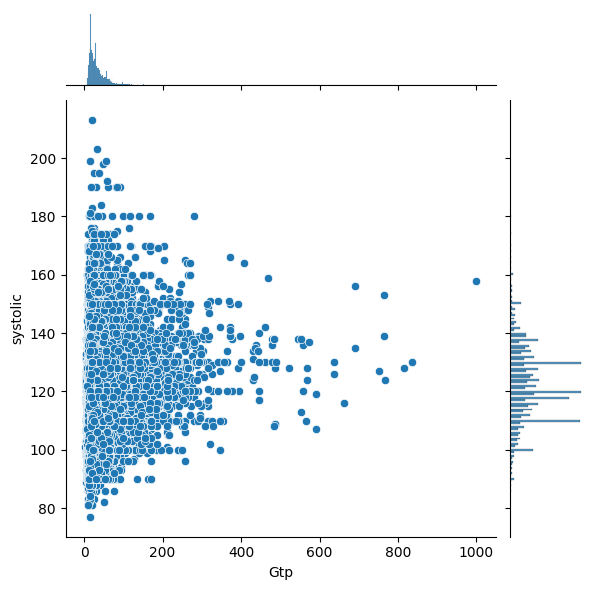

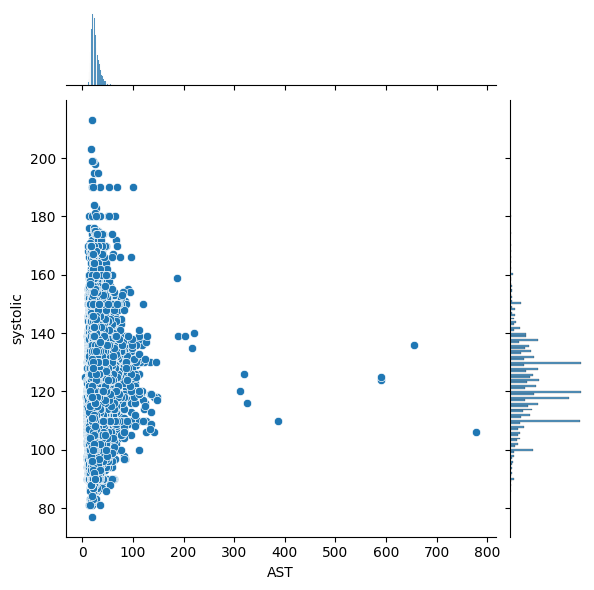

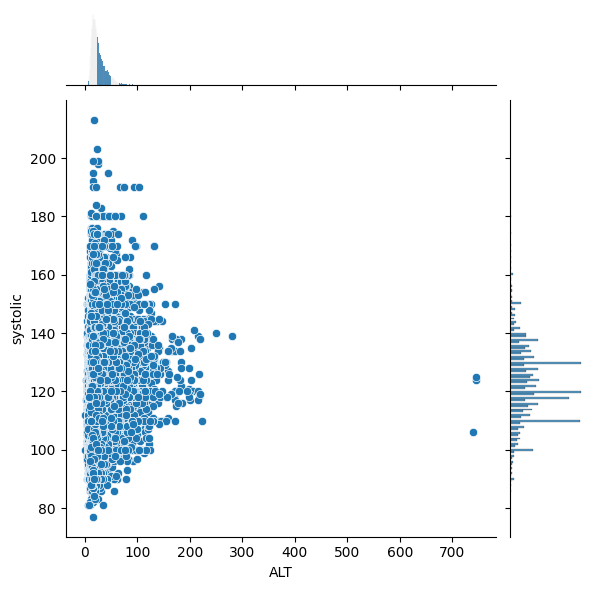

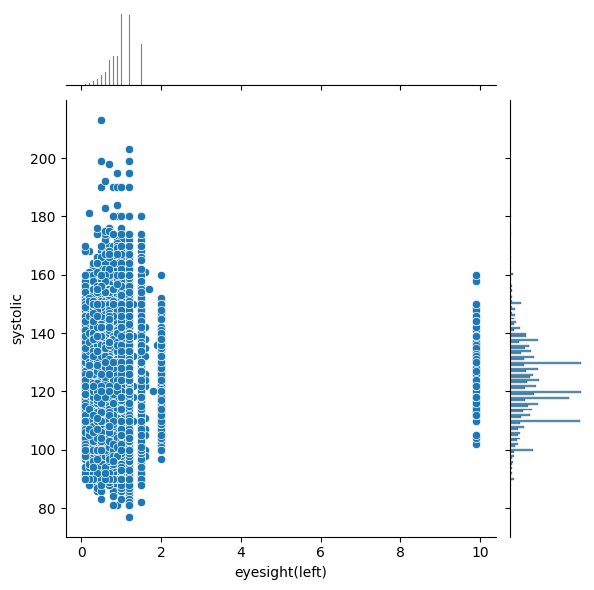

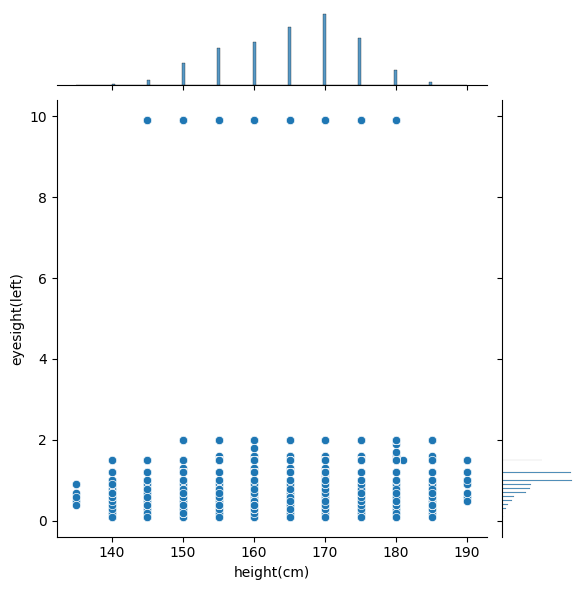

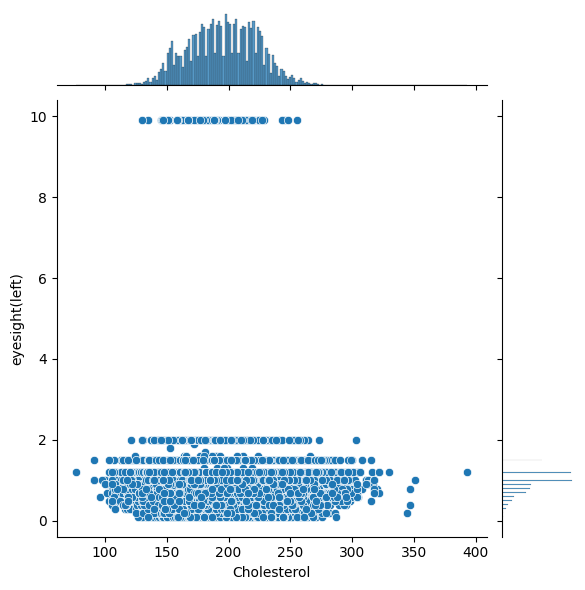

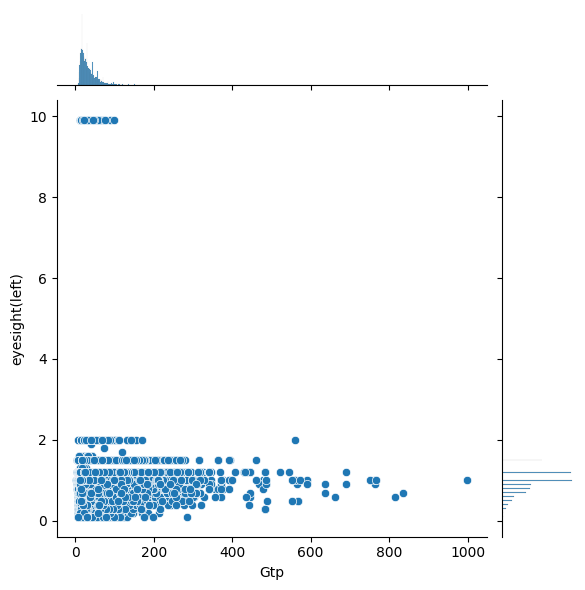

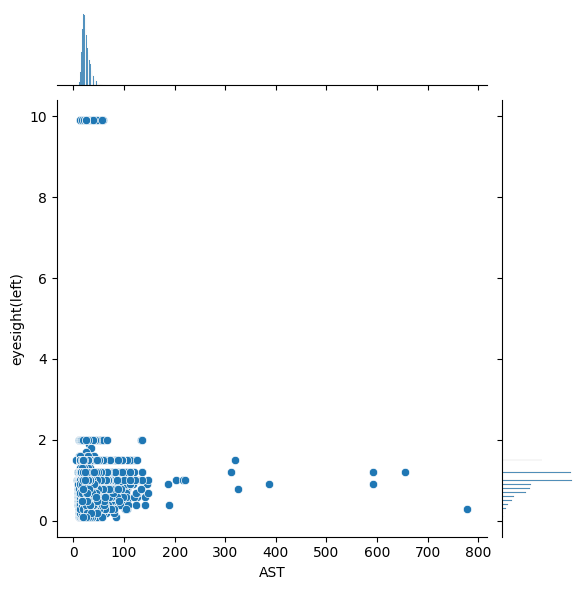

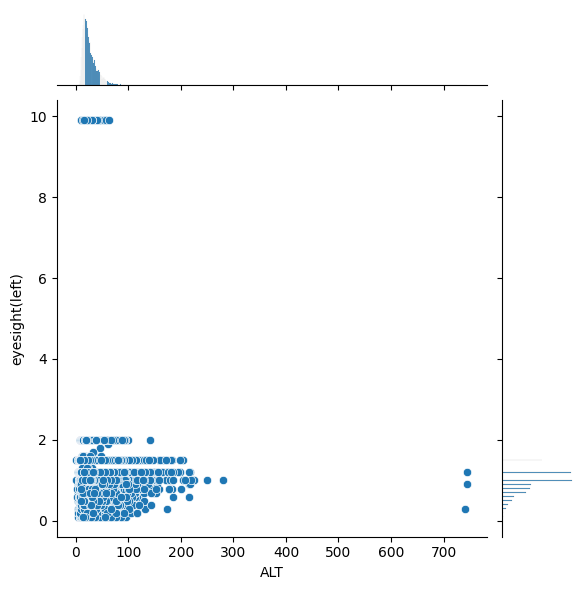

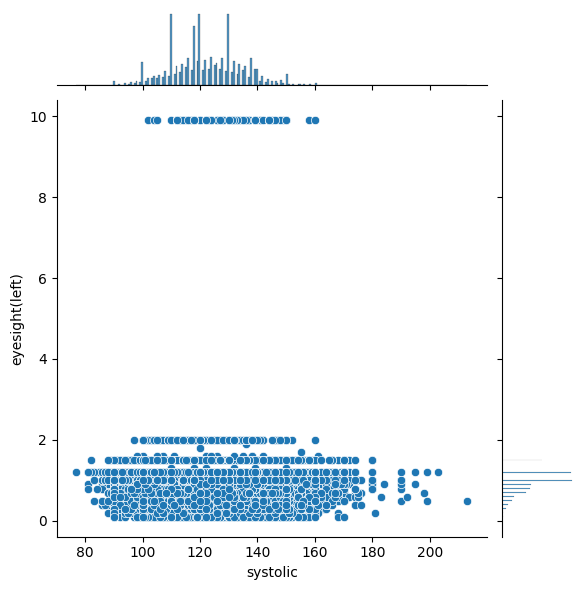

In [16]:
for j in range (0,len(cont_features)):
    for i in range (0,len(cont_features)):
        if cont_features[i]==cont_features[j]:
            continue
        # sns.scatterplot(x=train_data_str[cont_features[i]],y=train_data_str[cont_features[j]])
        # plt.show()
        sns.jointplot(x=cont_features[i],y=cont_features[j],data=train_data)
        plt.show()

<AxesSubplot:>

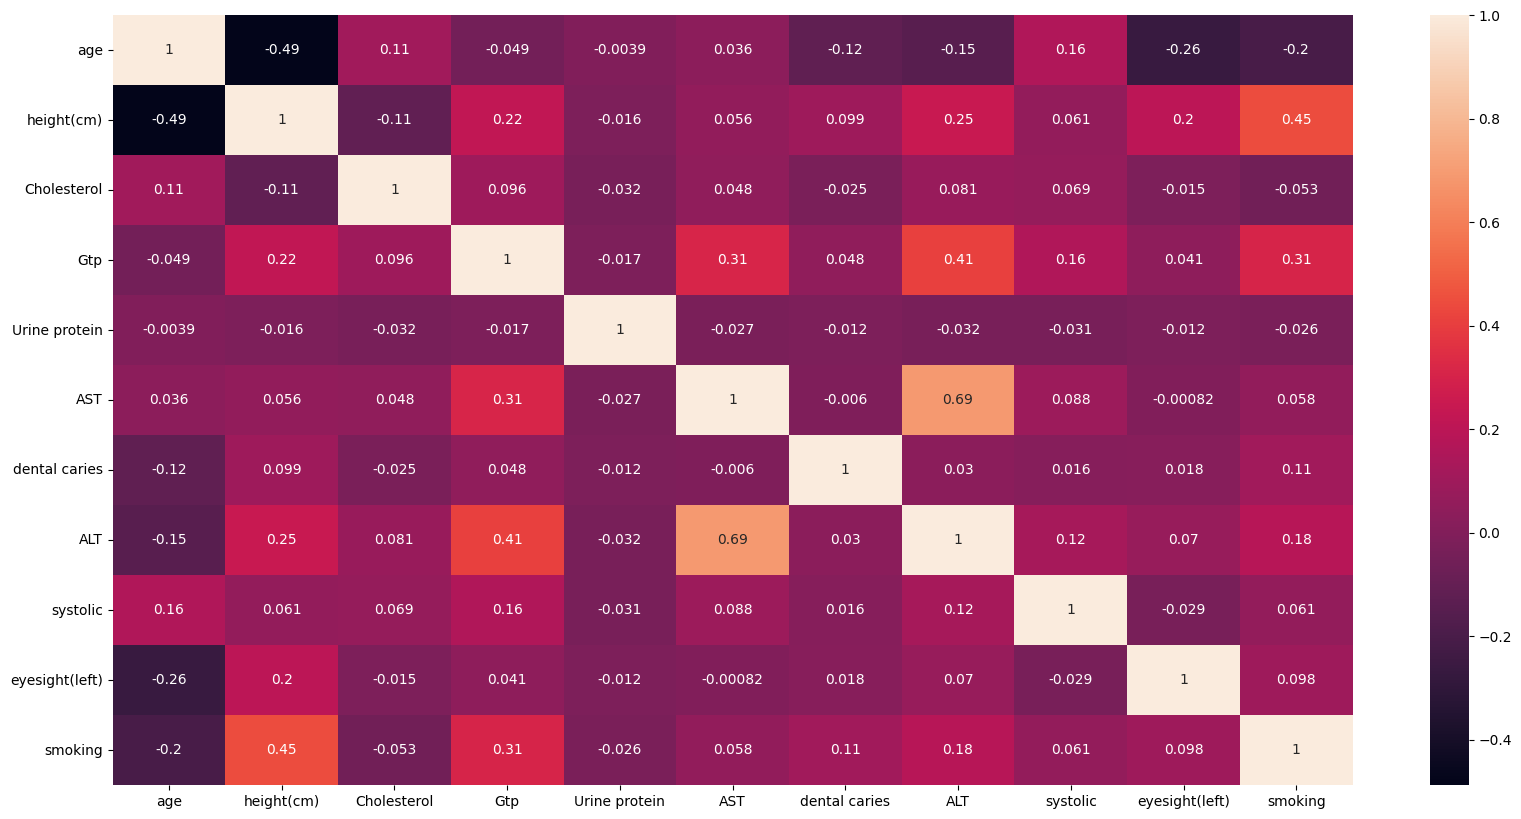

In [17]:
correlation = train_data.corr()

# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

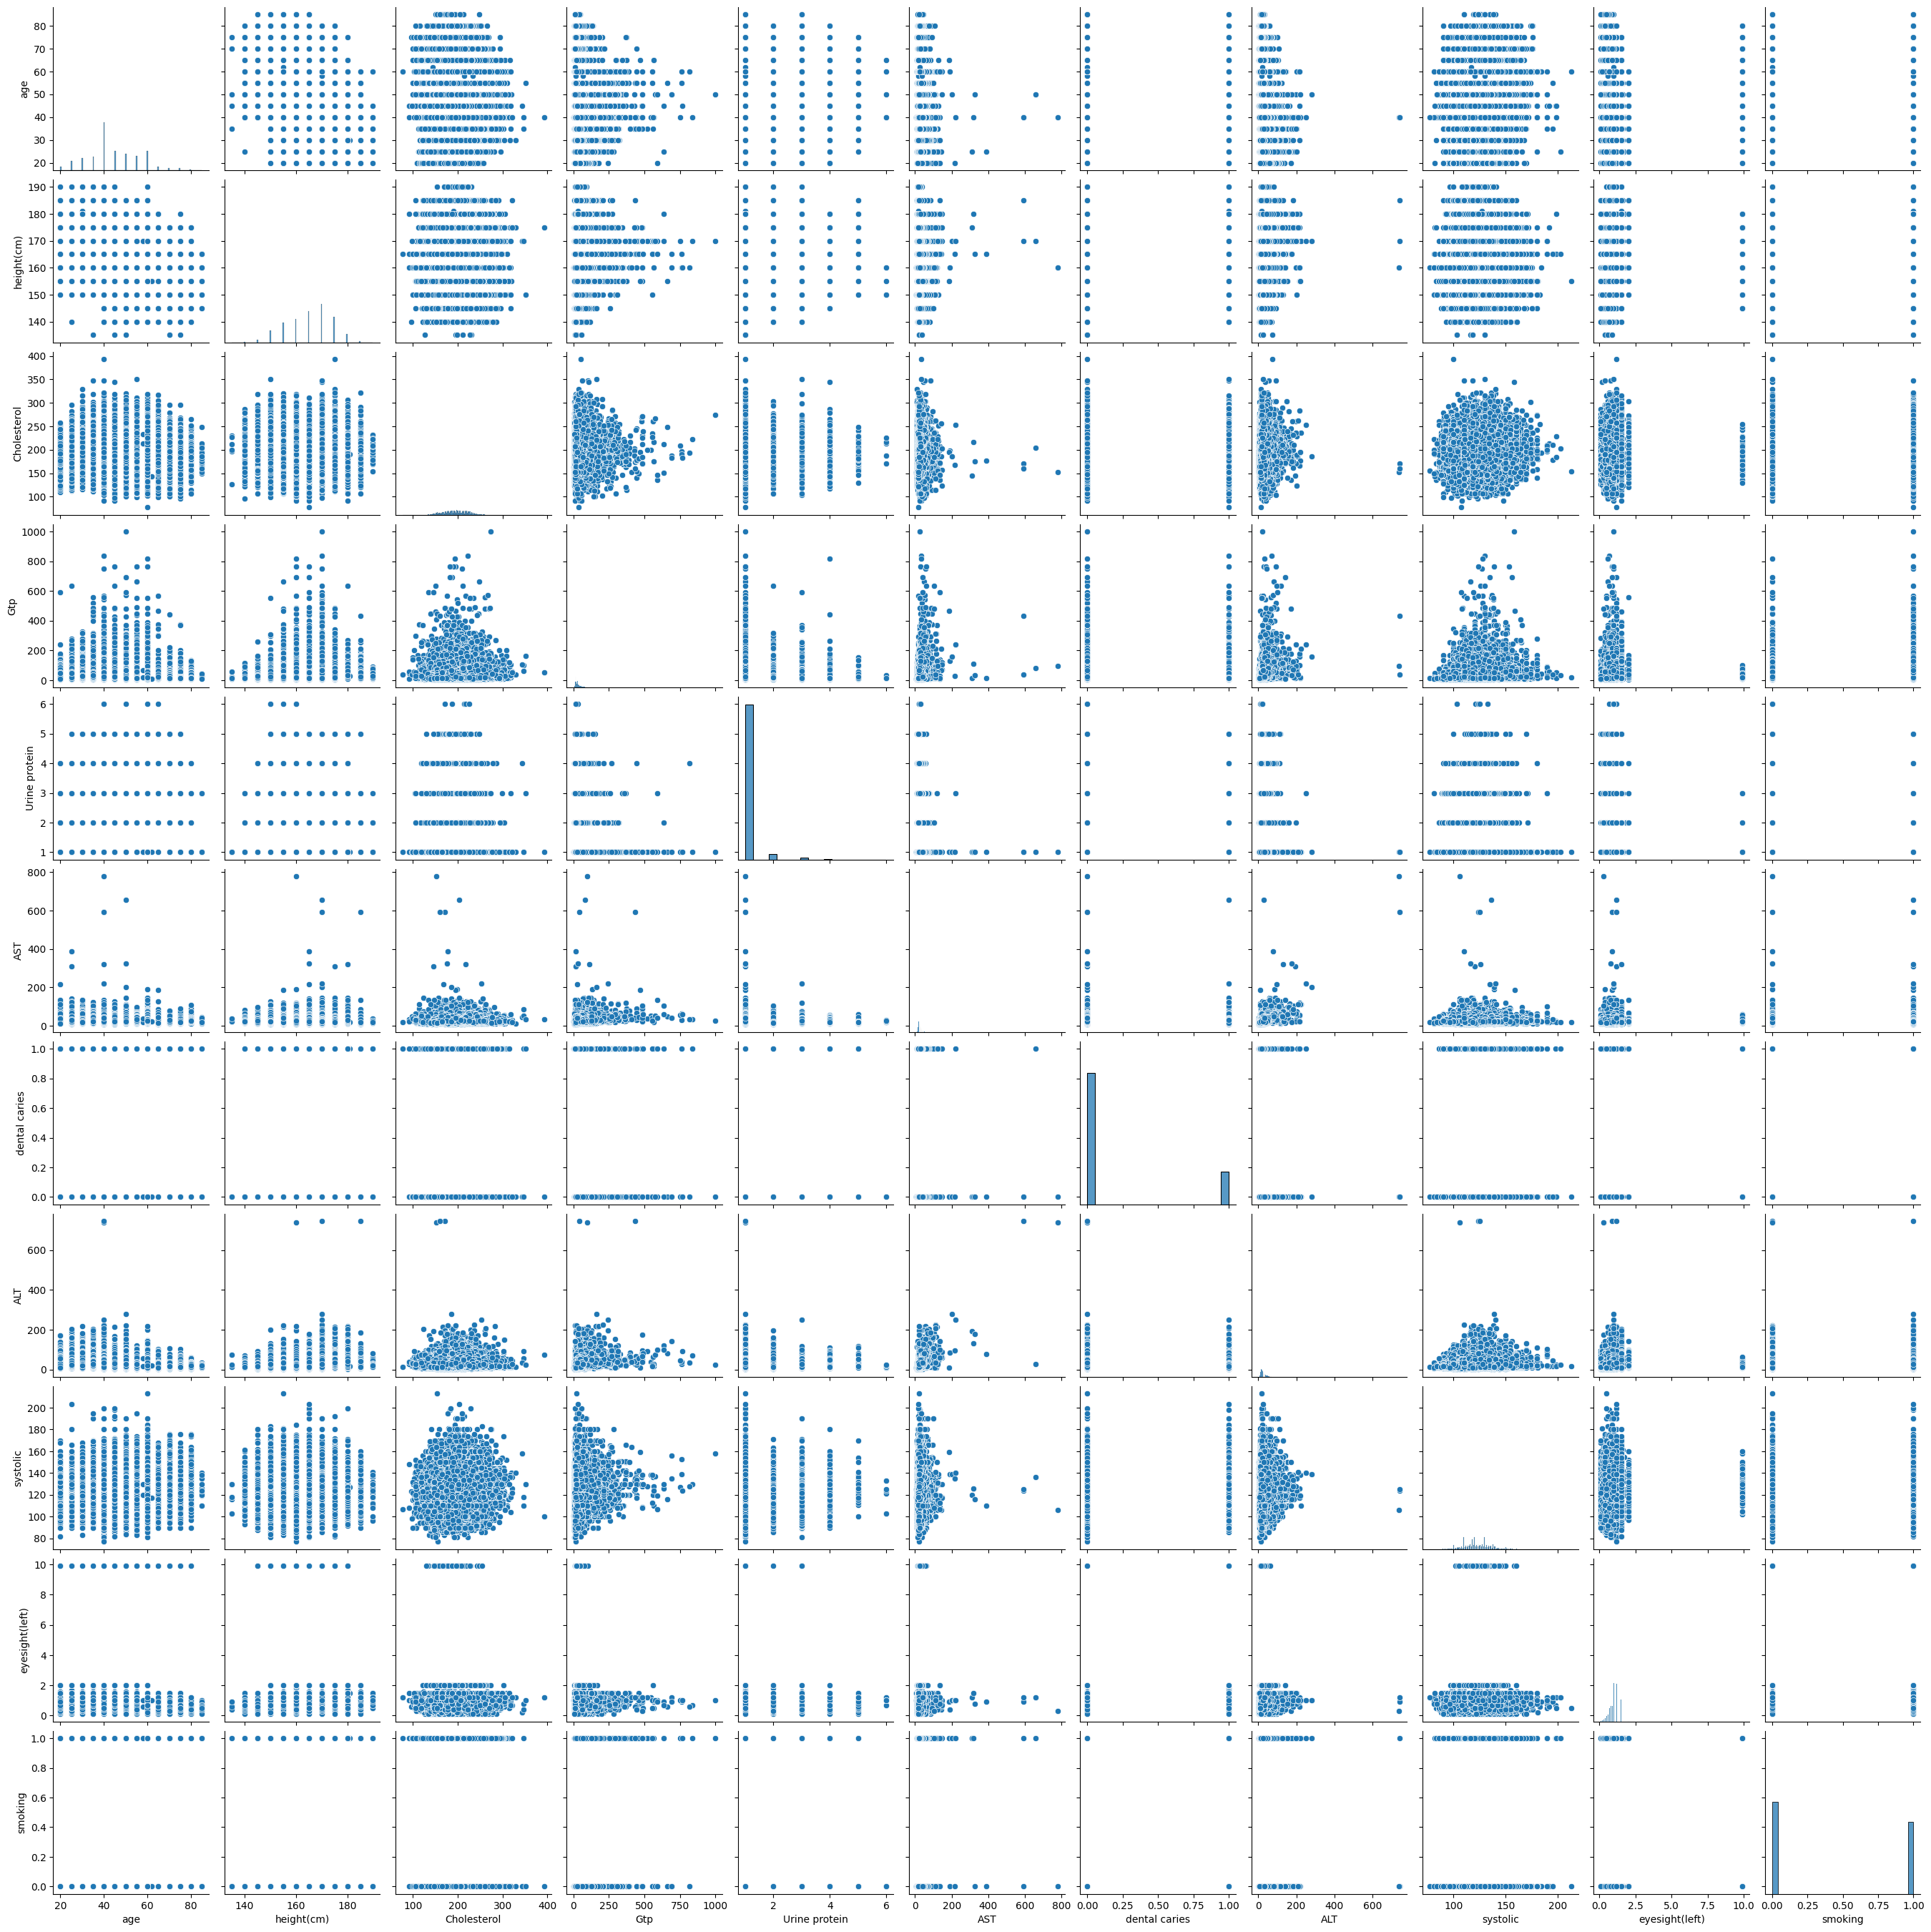

In [18]:
sns.pairplot(train_data)

In [19]:

print(train_data['ALT']/train_data['AST'],y_train)

52893     1.921053
55010     1.388889
42048     1.857143
34190     1.333333
10256     1.454545
            ...   
148581    0.846154
6574      0.421053
128757    0.652174
128756    1.181818
120345    0.804878
Length: 111479, dtype: float64 52893     1
55010     0
42048     1
34190     1
10256     1
         ..
148581    1
6574      0
128757    1
128756    1
120345    0
Name: smoking, Length: 111479, dtype: int64


# Deriving a new feature from ratio of  ALT and AST 

In [20]:
train_data.insert(0,'Liverfunction',train_data['ALT']/train_data['AST'])


In [21]:
train_data.head

<bound method NDFrame.head of         Liverfunction  age  height(cm)  Cholesterol  Gtp  Urine protein  AST  \
52893        1.921053   35         180          215  210              1   38   
55010        1.388889   30         170          175   25              1   36   
42048        1.857143   30         170          190   83              1   28   
34190        1.333333   40         170          189   79              1   24   
10256        1.454545   55         170          186   50              1   22   
...               ...  ...         ...          ...  ...            ...  ...   
148581       0.846154   60         160          225   22              1   26   
6574         0.421053   40         155          165   17              1   19   
128757       0.652174   40         165          165   51              1   23   
128756       1.181818   50         170          185   66              1   22   
120345       0.804878   40         155          195   25              1   41   

        d

In [22]:
data.columns

Index(['Unnamed: 0', 'age', 'height(cm)', 'Cholesterol', 'Gtp',
       'Urine protein', 'AST', 'dental caries', 'ALT', 'systolic',
       'eyesight(left)', 'smoking'],
      dtype='object')

In [23]:
data=pd.read_csv("./your_data.csv")
data=data.iloc[:,1:]

data.insert(0,'Liverfunction',(data['ALT']/data['AST']))


x = data.iloc[:, 0:11]
y = data["smoking"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=10)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,stratify=y_test,test_size=0.5,random_state=10)



train_data=pd.concat([x_train ,y_train],axis=1)
train_data.head
train_data.to_csv("training_data.csv")
Validation_data=pd.concat([x_valid ,y_valid],axis=1)
Validation_data.head
Validation_data.to_csv("validation_data.csv")
Testing_data=pd.concat([x_test ,y_test],axis=1)
Testing_data.head
Testing_data.to_csv("testing_data.csv")



In [24]:
train_data.columns


Index(['Liverfunction', 'age', 'height(cm)', 'Cholesterol', 'Gtp',
       'Urine protein', 'AST', 'dental caries', 'ALT', 'systolic',
       'eyesight(left)', 'smoking'],
      dtype='object')

## Analysis of new feature

<Figure size 500x500 with 0 Axes>

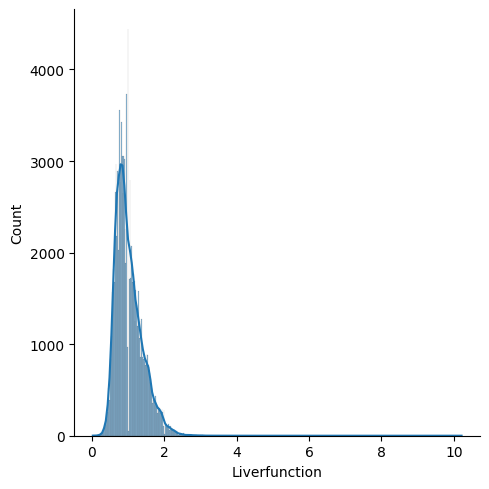

In [25]:
l=data['Liverfunction'].unique()
plt.figure(figsize=(5,5))
if len(l)<15:
    sns.countplot(train_data,x='Liverfunction')
else:
    sns.displot(train_data, kde=True,x='Liverfunction')
plt.show()

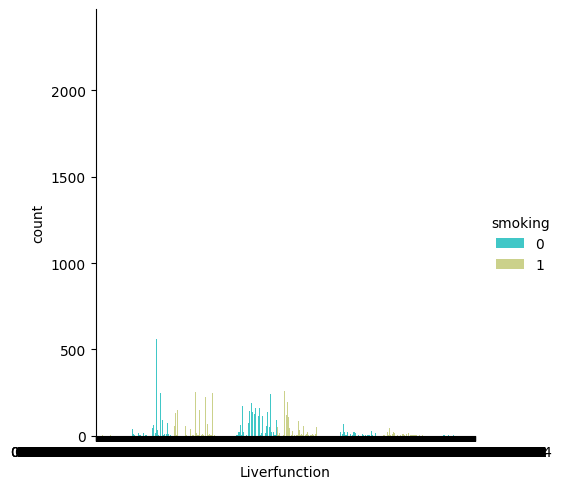

In [26]:
sns.catplot(x='Liverfunction',data=train_data,kind="count",hue="smoking",palette="rainbow")
plt.show()

In [29]:
data.to_csv("Used_data.csv")

<AxesSubplot:>

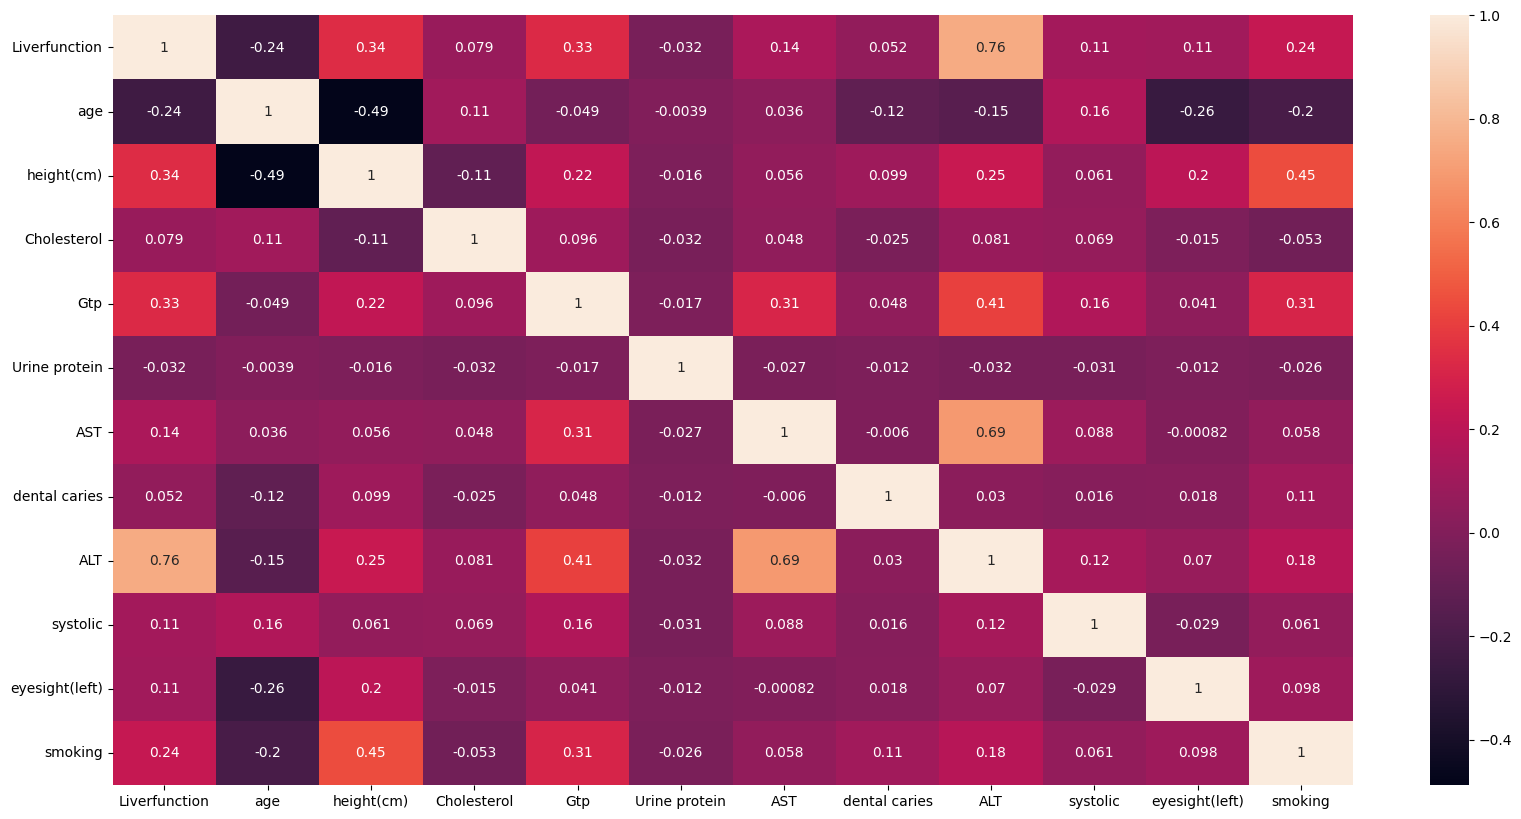

In [27]:
correlation = train_data.corr()

# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)